In [1]:
import os
import pandas as pd

In [2]:
lvi = pd.read_json(os.path.join('data','ceske_lvy.json'))

In [3]:
lvi.loc[lvi['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [4]:
lvi

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS
0,1994,1995-03-03,Nejlepší zvuk,Michal Dvořák (8266),nominace,Michal Dvořák,1965-11-23T00:00:00.000,None,Amerika (400609),Nejlepší zvuk
1,1994,1995-03-03,Nejlepší hudba,Michal Dvořák (8266),nominace,Michal Dvořák,1965-11-23T00:00:00.000,None,Amerika (400609),Nejlepší hudba
2,1994,1995-03-03,Nejlepší zvuk,Radim Hladík ml. (580),nominace,Radim Hladík jr.,1971-05-15T00:00:00.000,None,Amerika (400609),Nejlepší zvuk
3,1994,1995-03-03,Vedlejší mužský herecký výkon,Jiří Lábus (838),vyhra,Jiří Lábus,1950-01-26T00:00:00.000,None,Amerika (400609),Nejlepší herec ve vedlejší roli
4,1994,1995-03-03,Vedlejší mužský herecký výkon,Jiří Schmitzer (2936),nominace,Jiří Schmitzer,1949-10-25T00:00:00.000,None,Amerika (400609),Nejlepší herec ve vedlejší roli
...,...,...,...,...,...,...,...,...,...,...
2519,2023,2024-03-09,Nejlepší krátký film,Kryštof Burda,nominace,Kryštof Burda,None,None,Osmý den,Nejlepší krátký film
2520,2023,2024-03-09,Nejlepší krátký film,Tomáš Pertold,nominace,Tomáš Pertold,None,None,Osmý den,Nejlepší krátký film
2521,2023,2024-03-09,Nejlepší krátký film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Nejlepší krátký film
2522,2023,2024-03-09,Cena Magnesia za nejlepší studentský film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Cena Magnesia za nejlepší studentský film


In [5]:
lvi[(lvi['KategorieS'] == 'Nejlepší film') & (lvi['Lev'] == 'vyhra')][['Film','Ročník']].drop_duplicates().sort_values(by='Ročník')

,Film,Ročník
1321,Šakalí léta (7307),1993
1474,Díky za každé nové ráno (7866),1994
1734,Zahrada (8967),1995
418,Kolja (9013),1996
572,Knoflíkáři (9793),1997
24,Je třeba zabít Sekala (163291),1998
132,Návrat idiota (36916),1999
1339,Musíme si pomáhat (15231),2000
1507,Otesánek (401949),2001
595,Rok ďábla (12836),2002


In [6]:
lvi['Vyhlášení'] = pd.to_datetime(lvi['Vyhlášení'])
lvi['Datum narození'] = pd.to_datetime(lvi['Datum narození'], format='mixed', errors="coerce")

In [7]:
lvi['Věk'] = lvi['Vyhlášení'] - lvi['Datum narození']

In [8]:
len(lvi[lvi['Věk'].isnull()]) / len(lvi)

0.24524564183835182

In [9]:
bezveku = pd.Series(lvi[lvi['Věk'].isnull()].groupby('Jméno').size())
bezveku.nlargest(60)

Jméno
Jana Bílková (17734)                  9
Eric Abraham (1767)                   8
Pavel Hrdlička (5445)                 8
Michal Reitler (8046)                 6
Tereza Polachová (10612)              6
Henrich Boráros (8151)                5
Jiří Konečný (137301)                 5
Petr Turyna (13496)                   5
Ľubica Orechovská (62007)             5
František Lipták (6532)               4
Jan Novotný (22567)                   4
Jaroslava Brabcová Pecharová          4
Marius Corradini (26549)              4
Zuzana Bambušek Krejzková (140646)    4
Adam Martinec (422103)                3
Andrea McDonald (130268)              3
Bára Anna Stejskalová                 3
David Titěra (19106)                  3
Dušan Husár                           3
Hanka Kastelicová                     3
Jakub Viktorín (80877)                3
Jan Jirásek (7006)                    3
Jonatan Pjoni Pastirčák               3
Ján Kocman                            3
Kateřina Ondřejková (4248)        

In [10]:
lvovstvonestatutarni = lvi[lvi['Lev'] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [11]:
lvi['KategorieS'].drop_duplicates().to_list()

['Nejlepší zvuk',
 'Nejlepší hudba',
 'Nejlepší herec ve vedlejší roli',
 'Nejlepší výtvarný počin',
 'Nejlepší film',
 'Cena filmových kritiků',
 'Nejlepší režie',
 'Nejlepší herec v hlavní roli',
 'Nejlepší herečka ve vedlejší roli',
 'Nejlepší scénář',
 'Nejlepší střih',
 'Nejlepší kamera',
 'Hlavní ženský herecký výkon',
 'Nejlepší kostýmy',
 'Nejlepší filmový plakát',
 'Cena filmových kritiků a teoretiků za nejlepší hraný film',
 'Nejlepší dokument',
 'Nejlepší masky',
 'Nejlepší scénografie',
 'Cena filmových fanoušků',
 'Mimořádný počin v oblasti audiovize',
 'Nejlepší televizní seriál',
 'Dlouhodobý přínos českému filmu',
 'Nejlepší televizní film nebo minisérie',
 'Nejlepší animovaný film',
 'Nejlepší krátký film',
 'Cena Magnesia za nejlepší studentský film',
 'Cena ČFTA za audiovizuální počin roku',
 'Cena filmových kritiků a teoretiků za nejlepší dokument']

In [12]:
nejsoulvi = ['Cena filmových kritiků','Cena filmových kritiků a teoretiků za nejlepší hraný film','Cena filmových fanoušků','Nejlepší filmový plakát','Cena Magnesia za nejlepší studentský film']

In [13]:
lvi = lvi[~lvi['KategorieS'].isin(nejsoulvi)]

## Načtení filmů a žen

In [14]:
import json
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [15]:
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())

In [16]:
profese = seznamy["profese"]
", ".join(profese)

'Animace, Architekt, Asistent kamery, Asistent režie, Asistent střihu, Asistent vedoucího produkce, Asistent vedoucího výroby, Asistent zvuku, Assistent architekta, Autor komentáře, Autor projektu, Choreografie, Dialogy české verze, Dirigent, Dramaturg, Druhá kamera, Hrají, Hudba k písni, Hudba, text a zpěv písně, Hudební režie, Kamera, Kaskadéři, Komentář, Koordinátor kaskadérů, Kostýmy, Masky, Mluví, Návrhy kostýmů, Návrhy titulků, Odborný poradce, Pedagogické vedení, Pomocná režie, Postprodukce, Použitá hudba, Producent, Produkce, Původní filmový námět, Režie české verze, Režie, Scénář, Skript, Spolupráce, Střih, Technický scénář, Triky, Vedoucí produkce, Vedoucí výroby, Výběr hudby, Výkonná produkce, Výprava, Výtvarná spolupráce, Výtvarník, Zpívá, Zvláštní efekty, Zvuk, Zástupce vedoucího produkce, Zástupce vedoucího výroby, Účinkují, České podtitulky'

In [17]:
filmy = pd.read_json(os.path.join('data','filmy.json'))

In [18]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [19]:
filmy["Lidé"] = filmy[profese].values.tolist()
filmy["Lidé"] = filmy["Lidé"].apply(lambda x: plose_jednoduse(x))

In [20]:
lide = filmy[['Copyright','Film','Lidé']].explode('Lidé')

In [21]:
vsichnilide = lide['Lidé'].drop_duplicates().to_list()

In [22]:
def zenyzlidi(lidstvo):
    zeny_z_lidi = []
    for l in lidstvo:
        try:
            if l.split('(')[0].strip()[-1:] == 'á':
                zeny_z_lidi.append(l)
        except:
            pass
    return zeny_z_lidi

In [23]:
zeny2 = zenyzlidi(vsichnilide)

In [24]:
extrazeny = ['Gabriela Poláková','Agnieszka Holland','Halina Pawlowská','Vladivojovna La Chia','Vladivojna La Chia','Irena a Vojtěch Havlovi','Sussan Deyhim','La Petite Sonja','Irena Hradecká','Barbora Kačena','Milena Jelinek','Zdenka Simandlova','Andrea Schumacher','Ľubica Orechovská','Klára Bukovská','Kateřina Černá','Alice Nemanská','Mira Fornay','Jasmina Torbati','Susann Schimk','Katarína Horská','Andrea McDonald','Anett Weber','Barbara Kichi','Alina Janerka','Daria Kashcheeva','Anna Lyubynetska','Anna Wowra','Michaela Mihályi','Heike Richter-Karst','Patricia Ortiz Martinez','Dana Budisavljević','Miljenka Čogelja','Andrea Shaffer','Krystyna Krauze','Barbara Ławska','Jana Janěková ml.','Natália Pavlove']

In [25]:
for e in extrazeny:
    zeny.append(e)
for z in zeny2:
    zeny.append(z)

In [26]:
for z in [x for x in lvi[lvi['KategorieS'] == 'Hlavní ženský herecký výkon']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)
for z in [x for x in lvi[lvi['KategorieS'] == 'Nejlepší herečka ve vedlejší roli']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)

In [27]:
def zenyzelvu():
    dalsizeny = []
    lvixxxx = lvi['Jméno bez id'].drop_duplicates().to_list()
    for x in lvixxxx:
        if x.strip()[-1] == 'á':
            dalsizeny.append(x.strip())
    return(dalsizeny)
poslednizeny = zenyzelvu()
for p in poslednizeny:
    zeny.append(p)

In [28]:
zeny = list(set(zeny))

In [181]:
lide10 = lide[lide['Copyright'] >= 1993].groupby("Lidé")['Film'].nunique()
lide10 = lide10[lide10 > 10]
lide10 = lide10.index.to_list()
lide10

['AMP, spol. s r.o. (92754)',
 'ARTsfx s.r.o. (122589)',
 'Adam Bláha (84030)',
 'Adam Dvořák (1809)',
 'Adam Klemens (1779)',
 'Adam Kruliš (9765)',
 'Adam Levý',
 'Adam Levý (78891)',
 'Adam Pitra (55287)',
 'Adam Vejvoda (6071)',
 'Adam Voneš',
 'Adam Voneš (34919)',
 'Agentura filmových kaskadérů – FILMKA (92420)',
 'Alan Soural',
 'Alan Soural (23639)',
 'Albert Malinovský',
 'Albert Malinovský (84874)',
 'Alena Mihulová (7032)',
 'Alena Müllerová (11622)',
 'Alexander Kiss (2434)',
 'Alexander Šurkala (16390)',
 'Alexandr Minajev (10988)',
 'Alexej Guha',
 'Alexej Guha (658)',
 'Aleš Březina (7094)',
 'Aleš Hart (129776)',
 'Aleš Najbrt (5647)',
 'Aleš Novák (644)',
 'Aleš Týbl (14604)',
 'Alfons Mensdorff-Pouilly (8768)',
 'Alice Bendová (8726)',
 'Alice Nellis (535)',
 'Alice Růžičková (499)',
 'Alois Fišárek (570)',
 'Alois Švehlík (6277)',
 'Alžběta Jungrová',
 'Alžběta Jungrová (78785)',
 'Andrea Hoffmannová',
 'Andrea Králová (4679)',
 'Andrej Hryc (6636)',
 'Andrej Polák (

In [201]:
lide22 = lide[lide['Copyright'] >= 1993].groupby("Lidé")['Film'].nunique()
lide22 = lide22[lide22 > 10]
lide22 = lide22.index.to_list()
lide22

['AMP, spol. s r.o. (92754)',
 'ARTsfx s.r.o. (122589)',
 'Adam Bláha (84030)',
 'Adam Dvořák (1809)',
 'Adam Klemens (1779)',
 'Adam Kruliš (9765)',
 'Adam Levý',
 'Adam Levý (78891)',
 'Adam Pitra (55287)',
 'Adam Vejvoda (6071)',
 'Adam Voneš',
 'Adam Voneš (34919)',
 'Agentura filmových kaskadérů – FILMKA (92420)',
 'Alan Soural',
 'Alan Soural (23639)',
 'Albert Malinovský',
 'Albert Malinovský (84874)',
 'Alena Mihulová (7032)',
 'Alena Müllerová (11622)',
 'Alexander Kiss (2434)',
 'Alexander Šurkala (16390)',
 'Alexandr Minajev (10988)',
 'Alexej Guha',
 'Alexej Guha (658)',
 'Aleš Březina (7094)',
 'Aleš Hart (129776)',
 'Aleš Najbrt (5647)',
 'Aleš Novák (644)',
 'Aleš Týbl (14604)',
 'Alfons Mensdorff-Pouilly (8768)',
 'Alice Bendová (8726)',
 'Alice Nellis (535)',
 'Alice Růžičková (499)',
 'Alois Fišárek (570)',
 'Alois Švehlík (6277)',
 'Alžběta Jungrová',
 'Alžběta Jungrová (78785)',
 'Andrea Hoffmannová',
 'Andrea Králová (4679)',
 'Andrej Hryc (6636)',
 'Andrej Polák (

## Basic statistiky a rekordy

In [29]:
lvi.groupby('Ročník')['Kategorie'].nunique()

Ročník
1993    10
1994    13
1995    14
1996    13
1997    13
1998    13
1999    13
2000    13
2001    14
2002    14
2003    13
2004    13
2005    13
2006    13
2007    13
2008    14
2009    15
2010    15
2011    15
2012    15
2013    16
2014    16
2015    16
2016    16
2017    16
2018    17
2019    17
2020    20
2021    20
2022    21
2023    19
Name: Kategorie, dtype: int64

In [30]:
lvi.groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Bratři                          14
Fair Play (400561)              14
Havel (402069)                  14
Hořící keř (398412)             14
Krajina ve stínu (402170)       14
Ztraceni v Mnichově (400606)    14
Bába z ledu (401257)            13
Díra u Hanušovic (400560)       13
Masaryk (401331)                13
Okupace (402157)                13
Po strništi bos (401274)        13
Toman (401772)                  13
Zátopek                         13
Šarlatán (402092)               13
Anthropoid (400929)             12
Name: Kategorie, dtype: int64

In [31]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Masaryk (401331)                  12
Hořící keř (398412)               11
Je třeba zabít Sekala (163291)    10
Nabarvené ptáče (401962)           9
Ve stínu (66076)                   9
Zátopek                            8
Cesta ven (400548)                 7
Štěstí (17155)                     7
                                   6
Bába z ledu (401257)               6
Il Boemo                           6
Kobry a Užovky (400584)            6
Kolja (9013)                       6
Krajina ve stínu (402170)          6
Protektor (52494)                  6
Name: Kategorie, dtype: int64

In [32]:
lvi.groupby('Jméno').size().nlargest(10)

Jméno
Martin Štrba (829)          21
Pavel Rejholec (5364)       18
Alois Fišárek (570)         17
Jan Svěrák (476)            17
Karel Roden nejml. (494)    16
Radim Hladík ml. (580)      16
Jan Hřebejk (4831)          14
Milan Býček (4811)          14
Pavel Strnad (2506)         14
Petr Zelenka (4806)         14
dtype: int64

In [33]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno').size().nlargest(15)

Jméno
Jiří Brožek (154)          9
Pavel Rejholec (5364)      8
Vladimír Smutný (1772)     8
Ivan Trojan (6789)         7
Jakub Čech (6357)          7
Alois Fišárek (570)        6
Anna Geislerová (5433)     5
Bohdan Sláma (926)         5
David Ondříček (2028)      5
Jan Svěrák (476)           5
Jan Vlasák (1805)          5
Jan Švankmajer (406)       5
Klára Melíšková (13764)    5
Martin Štrba (829)         5
Petr Zelenka (4806)        5
dtype: int64

In [34]:
lvi.groupby('Jméno')['KategorieS'].nunique().nlargest()

Jméno
Jan Švankmajer (406)       6
David Ondříček (2028)      4
Jan Prušinovský (15043)    4
Jiří Bartoška (827)        4
Martin Šulík (5432)        4
Name: KategorieS, dtype: int64

In [35]:
lvi[lvi['Jméno'] == 'Jan Švankmajer (406)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
794,1994,1995-03-03,Dlouholetý umělecký přínos českému filmu,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,,Dlouhodobý přínos českému filmu,22095 days
1491,1994,1995-03-03,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší režie,22095 days
1492,1994,1995-03-03,Nejlepší scénář,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší scénář,22095 days
1493,1994,1995-03-03,Nejlepší výtvarný počin,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,Lekce Faust (7783),Nejlepší výtvarný počin,22095 days
1498,2001,2002-03-02,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší režie,24651 days
1499,2001,2002-03-02,Nejlepší scénář,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší scénář,24651 days
1501,2001,2002-03-02,Nejlepší výtvarné řešení,Jan Švankmajer (406),vyhra,Jan Švankmajer,1934-09-04,None,Otesánek (401949),Nejlepší výtvarný počin,24651 days
1510,2020,2021-03-06,Nejlepší dokumentární film,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Alchymická pec (402082),Nejlepší dokument,31595 days
1516,1996,1997-03-01,Nejlepší výtvarný počin,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Spiklenci slasti (9103),Nejlepší výtvarný počin,22824 days
1520,2010,2011-03-05,Nejlepší režie,Jan Švankmajer (406),nominace,Jan Švankmajer,1934-09-04,None,Přežít svůj život (163876),Nejlepší režie,27941 days


In [36]:
lvi[lvi['Lev'] == 'vyhra'].groupby('Jméno')['KategorieS'].nunique().nlargest(10)

Jméno
David Ondříček (2028)      3
Jan Budař (11090)          3
Jan Švankmajer (406)       3
Julius Ševčík (149)        3
Pavla Kubečková (35194)    3
Václav Marhoul (3781)      3
Alois Fišárek (570)        2
Anna Geislerová (5433)     2
Bohdan Sláma (926)         2
David Vondráček (616)      2
Name: KategorieS, dtype: int64

In [37]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "David Ondříček (2028)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
735,2012,2013-03-02,Nejlepší film,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší film,15958 days
736,2012,2013-03-02,Nejlepší režie,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší režie,15958 days
737,2012,2013-03-02,Nejlepší scénář,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Ve stínu (66076),Nejlepší scénář,15958 days
760,2021,2022-03-05,Nejlepší celovečerní hraný film,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Zátopek,Nejlepší film,19248 days
761,2021,2022-03-05,Nejlepší režie,David Ondříček (2028),vyhra,David Ondříček,1969-06-23,None,Zátopek,Nejlepší režie,19248 days


In [38]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Jan Budař (11090)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1437,2003,2004-03-03,Hlavní mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Nuda v Brně (20268),Nejlepší herec v hlavní roli,9712 days
1438,2003,2004-03-03,Nejlepší scénář,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Nuda v Brně (20268),Nejlepší scénář,9712 days
829,2004,2005-03-05,Vedlejší mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Mistři (27735),Nejlepší herec ve vedlejší roli,10079 days
682,2007,2008-03-01,Vedlejší mužský herecký výkon,Jan Budař (11090),vyhra,Jan Budař,1977-07-31,None,Václav (54224),Nejlepší herec ve vedlejší roli,11171 days


In [39]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Pavla Janoušková Kubečková (107301)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk


In [40]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Julius Ševčík (149)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
383,2016,2017-03-04,Nejlepší film,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší film,14007 days
384,2016,2017-03-04,Nejlepší režie,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší režie,14007 days
385,2016,2017-03-04,Nejlepší scénář,Julius Ševčík (149),vyhra,Julius Ševčík,1978-10-28,None,Masaryk (401331),Nejlepší scénář,14007 days


In [41]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Jiří Brožek (154)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1417,1993,1994-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Krvavý román (398471),Nejlepší střih,17153 days
27,1998,1999-02-28,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Je třeba zabít Sekala (163291),Nejlepší střih,18982 days
48,2000,2001-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Anděl Exit (260),Nejlepší střih,19716 days
1429,2003,2004-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Nuda v Brně (20268),Nejlepší střih,20812 days
1439,2005,2006-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Sluneční stát (36261),Nejlepší střih,21536 days
1443,2006,2007-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Hezké chvilky bez záruky (38735),Nejlepší střih,21907 days
1457,2007,2008-03-01,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,...a bude hůř (45816),Nejlepší střih,22271 days
690,2011,2012-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Odcházení (56870),Nejlepší střih,23734 days
1287,2017,2018-03-10,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Špína (401181),Nejlepší střih,25932 days


In [42]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno')['Ročník'].nunique().nlargest(15)

Jméno
Jiří Brožek (154)          9
Pavel Rejholec (5364)      8
Vladimír Smutný (1772)     8
Jakub Čech (6357)          7
Alois Fišárek (570)        6
Ivan Trojan (6789)         6
Anna Geislerová (5433)     5
Jan Vlasák (1805)          5
Klára Melíšková (13764)    5
Martin Štrba (829)         5
Radim Hladík ml. (580)     5
Ivo Špalj (694)            4
Jan P. Muchow (2302)       4
Jan Švankmajer (406)       4
Jiří Schmitzer (2936)      4
Name: Ročník, dtype: int64

In [43]:
lvovstvo = lvi[lvi["Lev"] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [44]:
lvi[~lvi['Jméno'].isin(lvovstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jana Bílková (17734)         9
Petr Ostrouchov (5833)       8
Jakub Hejna (2291)           7
Jan Čeněk (931)              6
Radim Procházka (7830)       6
Slávek Horák (80123)         6
Andrea Sedláčková (4786)     5
Ivan Fíla (11360)            5
Petr Turyna (13496)          5
Zuzana Mistríková (62009)    5
dtype: int64

In [179]:
lide[lide['Lidé'] == 'Jana Bílková (17734)']

,Copyright,Film,Lidé
3508,2004,Horem Pádem (22888),Jana Bílková (17734)
3609,2007,Medvídek (51760),Jana Bílková (17734)
3703,2009,El Paso (65979),Jana Bílková (17734)
3707,2009,Lištičky (37318),Jana Bílková (17734)
3752,2010,Občanský průkaz (103354),Jana Bílková (17734)
3841,2012,Modrý tygr (66111),Jana Bílková (17734)
3907,2013,Rozkoš (398432),Jana Bílková (17734)
3933,2013,Jako nikdy (400574),Jana Bílková (17734)
3938,2013,Můj pes Killer (398425),Jana Bílková (17734)
4065,2015,Ztraceni v Mnichově (400606),Jana Bílková (17734)


In [180]:
len(lide[lide['Lidé'] == 'Jana Bílková (17734)'])

22

In [202]:
(lvi[lvi['Jméno'].isin(lide22)].groupby('Jméno').size() / lide[(lide['Lidé'].isin(lide22)) & (lide['Copyright'] >= 1993)].groupby("Lidé")['Film'].nunique()).dropna().sort_values(ascending=False).head(60)

Jan Svěrák (476)                      1.062500
Alice Nellis (535)                    0.733333
Václav Marhoul (3781)                 0.615385
Bohdan Sláma (926)                    0.562500
Jan Hřebejk (4831)                    0.560000
Martin Šulík (5432)                   0.526316
Martin Štrba (829)                    0.525000
Zdeněk Svěrák (1892)                  0.523810
Jan P. Muchow (2302)                  0.523810
Jan Vlasák (1805)                     0.500000
Ivan Trojan (6789)                    0.480000
Jan Macola (86161)                    0.454545
Zuzana Mistríková (62009)             0.454545
Ľubica Orechovská (62007)             0.454545
Pavel Hrdlička (5445)                 0.444444
Helena Třeštíková (709)               0.444444
Klára Melíšková (13764)               0.437500
Simona Rybáková (14234)               0.437500
Tereza Polachová (10612)              0.428571
Štěpán Kučera (492)                   0.428571
Vladimír Smutný (1772)                0.419355
Ondřej Trojan

In [203]:
(lvi[lvi['Jméno'].isin(lide10)].groupby('Jméno').size() / lide[(lide['Lidé'].isin(lide10)) & (lide['Copyright'] >= 1993)].groupby("Lidé").size()).dropna().sort_values(ascending=False).head(60)

Jan Svěrák (476)                      1.062500
Alice Nellis (535)                    0.733333
Václav Marhoul (3781)                 0.615385
Bohdan Sláma (926)                    0.562500
Jan Hřebejk (4831)                    0.560000
Martin Šulík (5432)                   0.526316
Martin Štrba (829)                    0.525000
Zdeněk Svěrák (1892)                  0.523810
Jan P. Muchow (2302)                  0.523810
Jan Vlasák (1805)                     0.500000
Ivan Trojan (6789)                    0.480000
Jan Macola (86161)                    0.454545
Zuzana Mistríková (62009)             0.454545
Ľubica Orechovská (62007)             0.454545
Pavel Hrdlička (5445)                 0.444444
Helena Třeštíková (709)               0.444444
Klára Melíšková (13764)               0.437500
Simona Rybáková (14234)               0.437500
Tereza Polachová (10612)              0.428571
Štěpán Kučera (492)                   0.428571
Vladimír Smutný (1772)                0.419355
Ondřej Trojan

In [200]:
(lvi[lvi['Jméno'].isin(lide10)].groupby('Jméno').size() / lide[(lide['Lidé'].isin(lide10)) & (lide['Copyright'] >= 1993)].groupby("Lidé")['Film'].nunique()).fillna(0).sort_values(ascending=False).quantile(0.97)

0.36363636363636365

In [45]:
lvi[lvi['Lev'] == 'nominace'].groupby('Jméno').size().nlargest(20)

Jméno
Martin Štrba (829)                    16
Karel Roden nejml. (494)              14
Jan Svěrák (476)                      12
Milan Býček (4811)                    12
Tatiana Vilhelmová (935)              12
Vladimír Barák (5994)                 12
Alois Fišárek (570)                   11
Jan Hřebejk (4831)                    11
Marek Hart (6865)                     11
Ondřej Trojan (1348)                  11
Radim Hladík ml. (580)                11
Alice Nellis (535)                    10
Katarína Štrbová-Bieliková (11407)    10
Pavel Rejholec (5364)                 10
Pavel Strnad (2506)                   10
Jana Bílková (17734)                   9
Miroslav Krobot (21995)                9
Petr Zelenka (4806)                    9
Viktor Ekrt (1248)                     9
Anna Geislerová (5433)                 8
dtype: int64

In [46]:
nominantstvo = lvi[lvi["Lev"] == 'nominace']['Jméno'].drop_duplicates().to_list()

In [47]:
lvi[~lvi['Jméno'].isin(nominantstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jan Budař (11090)            4
Jan Balej (211)              3
Julius Ševčík (149)          3
Martin Velíšek (1289)        3
Adéla Komrzý (100948)        2
Agnieszka Holland (12106)    2
David Vondráček (616)        2
Jiří Kodet (7135)            2
Luboš Fišer (1492)           2
Lukáš Přibyl (35920)         2
dtype: int64

In [48]:
(lvi[lvi['Lev'] == 'vyhra']['Věk'].max() - lvi[lvi['Lev'] == 'vyhra']['Věk'].min()).days / 365.25

83.84394250513347

In [49]:
2616 / 365.25

7.162217659137577

In [50]:
lvi.sort_values(by="Věk").head(10)

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
431,1996,1997-03-01,Vedlejší mužský herecký výkon,Andrej Chalimon (37311),vyhra,Andrej Chalimon,1990-01-01,None,Kolja (9013),Nejlepší herec ve vedlejší roli,2616 days
563,2019,2020-03-07,Nejlepší mužský herecký výkon v hlavní roli,Petr Kotlár (120298),nominace,Petr Kotlár,2007-01-01,None,Nabarvené ptáče (401962),Nejlepší herec v hlavní roli,4814 days
125,1995,1996-03-02,Hlavní ženský herecký výkon,Klára Issová (1058),nominace,Klára Issová,1979-04-26,None,Indiánské léto (8296),Hlavní ženský herecký výkon,6155 days
1739,1995,1996-03-02,Hlavní ženský herecký výkon,Zuzana Šulajová (8446),nominace,Zuzana Šulajová,1978-07-14,None,Zahrada (8967),Hlavní ženský herecký výkon,6441 days
121,1995,1996-03-02,Vedlejší ženský herecký výkon,Tatiana Vilhelmová (935),nominace,Tatiana Dyková Vilhelmová,1978-07-13,None,Indiánské léto (8296),Nejlepší herečka ve vedlejší roli,6442 days
1381,2011,2012-03-03,Vedlejší ženský herecký výkon,Anna Linhartová (79451),nominace,Anna Linhartová,1994-03-21,None,Nevinnost (163675),Nejlepší herečka ve vedlejší roli,6557 days
1592,1994,1995-03-03,Vedlejší ženský herecký výkon,Andrea Elsnerová (26762),nominace,Andrea Elsnerová,1977-02-05,None,Řád (7787),Nejlepší herečka ve vedlejší roli,6600 days
127,1996,1997-03-01,Hlavní ženský herecký výkon,Tatiana Vilhelmová (935),nominace,Tatiana Dyková Vilhelmová,1978-07-13,None,Šeptej (9148),Hlavní ženský herecký výkon,6806 days
656,1997,1998-02-28,Vedlejší ženský herecký výkon,Klára Issová (1058),vyhra,Klára Issová,1979-04-26,None,Nejasná zpráva o konci světa (9463),Nejlepší herečka ve vedlejší roli,6883 days
1485,1994,1995-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),nominace,Anna Geislerová,1976-04-17,None,Jízda (7790),Hlavní ženský herecký výkon,6894 days


In [51]:
lvi.sort_values(by="Věk",ascending=False).dropna()

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
810,2001,2002-03-02,Dlouholetý přínos českému filmu,Otakar Vávra (9507),vyhra,Otakar Vávra,1911-02-28,2011-09-15T00:00:00.000,,Dlouhodobý přínos českému filmu,33240 days
790,2012,2013-03-02,Mimořádný přínos českému filmu,Karel Černý (1241),vyhra,Karel Černý,1922-04-07,2014-09-05T00:00:00.000,,Dlouhodobý přínos českému filmu,33202 days
1373,2009,2010-03-06,Vedlejší mužský herecký výkon,Ladislav Chudík (14421),vyhra,Ladislav Chudík,1924-05-27,2015-06-29T00:00:00.000,Kawasakiho růže (118281),Nejlepší herec ve vedlejší roli,31329 days
692,2011,2012-03-03,Vedlejší ženský herecký výkon,Vlasta Chramostová (573),nominace,Vlasta Chramostová,1926-11-17,2019-10-06T00:00:00.000,Odcházení (56870),Nejlepší herečka ve vedlejší roli,31153 days
800,2014,2015-02-21,Mimořádný přínos české kinematografii,Drahomíra Vihanová (2076),vyhra,Drahomíra Vihanová,1930-07-31,2017-12-10T00:00:00.000,,Dlouhodobý přínos českému filmu,30886 days
...,...,...,...,...,...,...,...,...,...,...,...
1475,1994,1995-03-03,Nejlepší film,Miloš Fedaš (12407),vyhra,Miloš Fedaš,1953-09-04,2008-12-10T00:00:00.000,Díky za každé nové ráno (7866),Nejlepší film,15155 days
1607,1997,1998-02-28,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),nominace,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Bumerang (9242),Nejlepší herec ve vedlejší roli,14508 days
711,1998,1999-02-28,Nejlepší výtvarný počin,Martin Kurel (6828),nominace,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Postel (38577),Nejlepší výtvarný počin,13911 days
1807,1995,1996-03-02,Nejlepší výtvarný počin,Evženie Rážová (1094),nominace,Evženie Rážová,1960-01-20,2022-11-10T00:00:00.000,V erbu lvice (8141),Nejlepší výtvarný počin,13191 days


In [52]:
33240 / 365

91.06849315068493

In [53]:
inmemoriam = lvi[lvi['Datum úmrtí'] < lvi['Vyhlášení']].sort_values(by="Vyhlášení")
inmemoriam

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1494,1994,1995-03-03,Hlavní mužský herecký výkon,Petr Čepek (4764),vyhra,Petr Čepek,1940-09-16,1994-09-20T00:00:00.000,Lekce Faust (7783),Nejlepší herec v hlavní roli,19891 days
1581,1994,1995-03-03,Vedlejší mužský herecký výkon,Josef Kemr (4897),nominace,Josef Kemr,1922-06-20,1995-01-15T00:00:00.000,Pevnost (185691),Nejlepší herec ve vedlejší roli,26554 days
1624,2005,2006-02-25,Nejlepší výtvarný počin,Eva Švankmajerová (7289),vyhra,Eva Švankmajerová,1940-09-25,2005-10-20T00:00:00.000,Šílení (35194),Nejlepší výtvarný počin,23894 days
2140,2008,2009-03-07,Nejlepší dokument,Pavel Koutecký (566),vyhra,Pavel Koutecký,1956-06-10,2006-04-13T00:00:00.000,Občan Havel (45195),Nejlepší dokument,19263 days
1853,2010,2011-03-05,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),vyhra,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Kajínek (55120),Nejlepší herec ve vedlejší roli,19261 days
686,2011,2012-03-03,Nejlepší režie,Václav Havel (676),nominace,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší režie,27543 days
687,2011,2012-03-03,Nejlepší scénář,Václav Havel (676),vyhra,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší scénář,27543 days
1413,2012,2013-03-02,Vedlejší ženský herecký výkon,Jiřina Jirásková (22836),nominace,Jiřina Jirásková,1931-02-17,2013-01-07T00:00:00.000,Vrásky z lásky (160354),Nejlepší herečka ve vedlejší roli,29964 days
388,2016,2017-03-04,Nejlepší scénář,Alex Koenigsmark (76145),vyhra,Alex Koenigsmark,1944-05-27,2013-01-23T00:00:00.000,Masaryk (401331),Nejlepší scénář,26579 days
1893,2019,2020-03-07,Nejlepší filmová scénografie,Martin Kurel (6828),nominace,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Hodinářův učeň (401938),Nejlepší scénografie,21589 days


In [54]:
inmemoriam[inmemoriam['Lev'] == 'vyhra']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1494,1994,1995-03-03,Hlavní mužský herecký výkon,Petr Čepek (4764),vyhra,Petr Čepek,1940-09-16,1994-09-20T00:00:00.000,Lekce Faust (7783),Nejlepší herec v hlavní roli,19891 days
1624,2005,2006-02-25,Nejlepší výtvarný počin,Eva Švankmajerová (7289),vyhra,Eva Švankmajerová,1940-09-25,2005-10-20T00:00:00.000,Šílení (35194),Nejlepší výtvarný počin,23894 days
2140,2008,2009-03-07,Nejlepší dokument,Pavel Koutecký (566),vyhra,Pavel Koutecký,1956-06-10,2006-04-13T00:00:00.000,Občan Havel (45195),Nejlepší dokument,19263 days
1853,2010,2011-03-05,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),vyhra,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Kajínek (55120),Nejlepší herec ve vedlejší roli,19261 days
687,2011,2012-03-03,Nejlepší scénář,Václav Havel (676),vyhra,Václav Havel,1936-10-05,2011-12-18T00:00:00.000,Odcházení (56870),Nejlepší scénář,27543 days
388,2016,2017-03-04,Nejlepší scénář,Alex Koenigsmark (76145),vyhra,Alex Koenigsmark,1944-05-27,2013-01-23T00:00:00.000,Masaryk (401331),Nejlepší scénář,26579 days
1900,2020,2021-03-06,Nejlepší scénografie,Martin Kurel (6828),vyhra,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Marie Terezie II,Nejlepší scénografie,21953 days


In [55]:
lvi[lvi['Jméno'] == 'Michal Reitler (8046)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
989,2021,2022-03-05,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Božena,Nejlepší televizní film nebo minisérie,NaT
1174,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Podezření (396954),Nejlepší televizní film nebo minisérie,NaT
1939,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,Král Šumavy: Fantom temného kraje,Nejlepší televizní film nebo minisérie,NaT
2240,2022,2023-03-04,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Devadesátky,Nejlepší televizní seriál,NaT
2263,2023,2024-03-09,Nejlepší televizní seriál,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,"Dobré ráno, Brno!",Nejlepší televizní seriál,NaT
2493,2021,2022-03-05,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Ochránce,Nejlepší televizní seriál,NaT


In [56]:
lvi[lvi['Jméno'] == 'Andrea Sedláčková (4786)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1045,2014,2015-02-21,Nejlepší režie,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší režie,17531 days
1046,2014,2015-02-21,Nejlepší scénář,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší scénář,17531 days
2350,2014,2015-02-21,Nejlepší dokument,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Život podle Václava Havla (400664),Nejlepší dokument,17531 days
2351,2020,2021-03-06,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Můj otec Antonín Kratochvíl (402148),Nejlepší dokument,19736 days
2353,2022,2023-03-04,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,"Toyen, baronka surrealismu",Nejlepší dokument,20464 days


In [57]:
lvi.groupby(['Jméno','Ročník']).size().nlargest()

Jméno                     Ročník
Jan Švankmajer (406)      1994      4
Sean Ellis (130080)       2016      4
Václav Marhoul (3781)     2019      4
Andrea Sedláčková (4786)  2014      3
David Ondříček (2028)     2012      3
dtype: int64

In [58]:
lvi[lvi['KategorieS'].str.contains('here',na=False)].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                     Ročník
Boleslav Polívka (1556)   2000      2
David Novotný (1834)      2008      2
Eliška Balzerová (14418)  2010      2
Eliška Křenková (26750)   2021      2
Ivan Trojan (6789)        2002      2
Karel Roden nejml. (494)  2011      2
                          2016      2
Martin Huba (7134)        2009      2
Martin Pechlát (9426)     2021      2
Oldřich Kaiser (1794)     2011      2
Ondřej Vetchý (836)       2012      2
Adam Mišík (27584)        2022      1
Agnieszka Sitek (75805)   1998      1
Alena Mihulová (7032)     2015      1
                          2021      1
Alois Švehlík (6277)      2019      1
Andrea Elsnerová (26762)  1994      1
Andrej Chalimon (37311)   1996      1
Andrej Hryc (6636)        1998      1
Anna Friel (40427)        2008      1
dtype: int64

In [59]:
lvi[lvi['KategorieS'].str.contains('here',na=False) & (lvi['Lev'] == 'vyhra')].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                       Ročník
Ivan Trojan (6789)          2002      2
Agnieszka Sitek (75805)     1998      1
Alena Mihulová (7032)       2015      1
Andrej Chalimon (37311)     1996      1
Anna Geislerová (5433)      1999      1
                            2003      1
                            2005      1
                            2006      1
                            2011      1
Anna Šišková (6600)         2000      1
Antonie Formanová (131569)  2021      1
Boleslav Polívka (1556)     1996      1
                            2000      1
Daniela Kolářová (1847)     2009      1
Eliška Balzerová (14418)    2010      1
Eliška Křenková (26750)     2018      1
Emília Vášáryová (4986)     2004      1
Eva Holubová (5948)         2000      1
Gabriela Míčová (9758)      2012      1
Hynek Čermák (3370)         2011      1
dtype: int64

### Nej filmy do boxu

In [60]:
vypis_lvu = ""
for index, row in lvi[(lvi['KategorieS'] == 'Nejlepší film') & (lvi['Lev'] == 'vyhra')][['Film','Ročník']].drop_duplicates().sort_values(by='Ročník').iterrows():
    vypis_lvu += row['Film'].split(" (")[0] + " (" + str(row['Ročník']) + "), "
vypis_lvu[:-2]

'Šakalí léta (1993), Díky za každé nové ráno (1994), Zahrada (1995), Kolja (1996), Knoflíkáři (1997), Je třeba zabít Sekala (1998), Návrat idiota (1999), Musíme si pomáhat (2000), Otesánek (2001), Rok ďábla (2002), Nuda v Brně (2003), Horem Pádem (2004), Štěstí (2005), Obsluhoval jsem anglického krále (2006), Tajnosti (2007), Karamazovi (2008), Protektor (2009), Pouta (2010), Poupata (2011), Ve stínu (2012), Hořící keř (2013), Cesta ven (2014), Kobry a Užovky (2015), Masaryk (2016), Bába z ledu (2017), Všechno bude (2018), Nabarvené ptáče (2019), Šarlatán (2020), Zátopek (2021), Il Boemo (2022)'

In [61]:
lvi[lvi['KategorieS'] == 'Nejlepší film']['Kategorie'].drop_duplicates()

11                       Nejlepší film
102          Nejlepší celovečerní film
208    Nejlepší celovečerní hraný film
Name: Kategorie, dtype: object

## Spojení s filmy

In [62]:
typologie = filmy.explode("Typologie")
celoveceraky = typologie[(typologie['Typologie'] == 'hraný') & (typologie['Délka'] == 'dlouhometrážní')]
celoveceraky = celoveceraky['Film'].drop_duplicates().to_list()

In [63]:
hraji = filmy[['Copyright','Film','Hrají']]

In [64]:
hraji = hraji.explode("Hrají")

In [65]:
hraji[hraji['Hrají'].isin(lvovstvo)][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(10)

Film
Odcházení (56870)                13
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Mazaný Filip (20319)             11
Vrásky z lásky (160354)          10
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
Všichni moji blízcí (53125)       9
dtype: int64

In [66]:
hraji[hraji['Hrají'].isin(lvovstvonestatutarni)][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(10)

Film
Mazaný Filip (20319)             15
Odcházení (56870)                13
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Vrásky z lásky (160354)          10
Gympl (45351)                     9
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
dtype: int64

In [67]:
hraji[(hraji['Hrají'].isin(lvovstvonestatutarni)) & (hraji['Film'] == 'Mazaný Filip (20319)')]

,Copyright,Film,Hrají
3488,2003,Mazaný Filip (20319),Vilma Cibulková (2416)
3488,2003,Mazaný Filip (20319),Pavel Liška (984)
3488,2003,Mazaný Filip (20319),Eva Holubová (5948)
3488,2003,Mazaný Filip (20319),Matěj Hádek (11532)
3488,2003,Mazaný Filip (20319),Jiří Macháček (3133)
3488,2003,Mazaný Filip (20319),Oldřich Kaiser (1794)
3488,2003,Mazaný Filip (20319),Milan Šteindler (1572)
3488,2003,Mazaný Filip (20319),Aleš Najbrt (5647)
3488,2003,Mazaný Filip (20319),Barbara Trojanová (6032)
3488,2003,Mazaný Filip (20319),Ivan Trojan (6789)


In [68]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'].isin(hraji[hraji['Hrají'].isin(lvovstvo) & (hraji['Film'] == 'Mazaný Filip (20319)')]['Hrají'].to_list()))]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
95,2020,2021-03-06,Nejlepší herec v hlavní roli,Ivan Trojan (6789),vyhra,Ivan Trojan,1964-06-30,None,Šarlatán (402092),Nejlepší herec v hlavní roli,20703 days
131,1999,2000-03-04,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Návrat idiota (36916),Nejlepší herečka ve vedlejší roli,8722 days
150,2005,2006-02-25,Hlavní mužský herecký výkon,Pavel Liška (984),vyhra,Pavel Liška,1972-01-29,None,Štěstí (17155),Nejlepší herec v hlavní roli,12446 days
151,2005,2006-02-25,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Štěstí (17155),Nejlepší herečka ve vedlejší roli,10906 days
165,2014,2015-02-21,Hlavní mužský herecký výkon,Ivan Trojan (6789),vyhra,Ivan Trojan,1964-06-30,None,Díra u Hanušovic (400560),Nejlepší herec v hlavní roli,18498 days
381,2016,2017-03-04,Nejlepší mužský herecký výkon ve vedlejší roli,Oldřich Kaiser (1794),vyhra,Oldřich Kaiser,1955-05-16,None,Masaryk (401331),Nejlepší herec ve vedlejší roli,22573 days
548,2017,2018-03-10,Nejlepší mužský herecký výkon ve vedlejší roli,Oldřich Kaiser (1794),vyhra,Oldřich Kaiser,1955-05-16,None,Po strništi bos (401274),Nejlepší herec ve vedlejší roli,22944 days
558,2019,2020-03-07,Nejlepší film,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Nejlepší film,21952 days
559,2019,2020-03-07,Nejlepší režie,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Nejlepší režie,21952 days
561,2019,2020-03-07,Mimořádný počin v oblasti audiovize,Václav Marhoul (3781),vyhra,Václav Marhoul,1960-01-30,None,Nabarvené ptáče (401962),Mimořádný počin v oblasti audiovize,21952 days


In [69]:
hereckekategorie = ['Hlavní ženský herecký výkon', 'Nejlepší herečka ve vedlejší roli', 'Nejlepší herec v hlavní roli', 'Nejlepší herec ve vedlejší roli']

In [70]:
hereckelvovstvo = lvi[lvi['KategorieS'].isin(hereckekategorie) & (lvi['Lev'] == 'vyhra')]['Jméno'].drop_duplicates().to_list()

In [71]:
hraji[(hraji['Hrají'].isin(hereckelvovstvo))][['Hrají','Film']].drop_duplicates().groupby('Film').size().nlargest(60)

Film
Anděl Páně 2 (401251)                                     11
Odcházení (56870)                                         11
Velká filmová loupež (397520)                             11
Hořící keř (398412)                                        9
Andělé všedního dne (400528)                               8
Mazaný Filip (20319)                                       8
Padesátka (400593)                                         8
Tátova volha (401758)                                      8
Vrásky z lásky (160354)                                    8
Všichni moji blízcí (53125)                                8
Všiváci (400557)                                           8
Alois Nebel (80193)                                        7
Báječná léta pod psa (9462)                                7
Milada (401275)                                            7
Obsluhoval jsem anglického krále (43223)                   7
Ve stínu (66076)                                           7
Václav (54224)     

In [72]:
ap2 = hraji[(hraji['Hrají'].isin(hereckelvovstvo)) & (hraji['Film'] == 'Anděl Páně 2 (401251)')]['Hrají'].drop_duplicates().to_list()
ap = [a.split(" (")[0] for a in ap2]
", ".join(ap)

'Ivan Trojan, Boleslav Polívka, Pavel Liška, Marián Labuda, Jiří Bartoška, Klára Issová, Jiřina Bohdalová, Veronika Žilková, Martin Huba, Matěj Hádek, Josef Abrhám'

In [178]:
ap2 = hraji[(hraji['Hrají'].isin(hereckelvovstvo)) & (hraji['Film'] == 'Velká filmová loupež (397520)')]['Hrají'].drop_duplicates().to_list()
ap = [a.split(" (")[0] for a in ap2]
", ".join(ap)

'Oldřich Kaiser, Jiří Lábus, Stella Zázvorková, Jiří Kodet, Ladislav Chudík, Josef Abrhám, Marián Labuda, Jiří Bartoška, Vlastimil Brodský, Iva Janžurová, Jiří Schmitzer'

In [73]:
hraji[(hraji['Hrají'].isin(lvovstvo) | hraji['Hrají'].isin(nominantstvo))].groupby('Film').size().nlargest(20)

Film
Mazaný Filip (20319)                             19
Velká filmová loupež (397520)                    19
Ve stínu (66076)                                 18
Odcházení (56870)                                17
Toman (401772)                                   17
Čert ví proč (15823)                             17
Alois Nebel (80193)                              16
Anděl Páně 2 (401251)                            16
Prvok, Šampón, Tečka a Karel (402144)            16
Hořící keř (398412)                              15
Šarlatán (402092)                                15
Horem Pádem (22888)                              14
Zahradnictví: Dezertér (401670)                  14
Andělé všedního dne (400528)                     13
Hrubeš a Mareš jsou kamarádi do deště (23981)    13
Krajina ve stínu (402170)                        13
Největší z Čechů (157344)                        13
Obecná škola (397700)                            13
Padesátka (400593)                               13
Tři bra

In [74]:
lide[lide['Film'].str.contains('Tmavomodr',na=False)]['Lidé'].to_list()

['Jaroslav Matys (1822)',
 'Aleš Dlabač (1512)',
 'Zdeněk Urban (1824)',
 'Dennis Lowe (1827)',
 'Jaroslav Matys',
 'Aleš Dlabač',
 'Zdeněk Urban',
 'Dennis Lowe',
 'Jan Vlasák (1805)',
 'Karel Havelka (1775)',
 'David Rauch (1810)',
 'Václav Šašek (1766)',
 'Ramūnas Greičius (1773)',
 'Ondřej Vetchý (836)',
 'Kryštof Hádek (1830)',
 'Tara Fitzgerald (1831)',
 'Charles Dance (1833)',
 'Oldřich Kaiser (1794)',
 'David Novotný (1834)',
 'Linda Rybová (1835)',
 'Jaromír Dulava (1837)',
 'Lukáš Kantor (1838)',
 'Radim Fiala (1839)',
 'Juraj Bernáth (1840)',
 'Miroslav Táborský (1841)',
 'Hans-Jorg Assmann (1842)',
 'Viktor Preiss (1843)',
 'Thure Riefenstein (1844)',
 'Anna Massey (1845)',
 'John Warnaby (1846)',
 'Jiří Lábus (838)',
 'Daniela Kolářová (1847)',
 'Filip Renč (558)',
 'Petr Burian (589)',
 'Čestmír Řanda ml. (3668)',
 'Martin Dostál (1849)',
 'Jeremy Swift (1793)',
 'Sophie Wilcox (1850)',
 'Caroline Holdway (1851)',
 'Charlotte Fairman (1852)',
 'Wiliam S. Mason (1853)',
 '

In [75]:
lide[lide['Lidé'].str.contains('Vladimír Sm',na=False)]

,Copyright,Film,Lidé
169,1921,Román boxera (395263),Vladimír Smíchovský (127807)
172,1921,Poslední radost (395260),Vladimír Smíchovský (127807)
200,1921,Irčin románek II. (395246),Vladimír Smíchovský (127807)
208,1921,Irčin románek I. (395245),Vladimír Smíchovský (127807)
209,1922,Likérová princeznička (395289),Vladimír Smíchovský (127807)
...,...,...,...
4295,2018,Tátova volha (401758),Vladimír Smutný (1772)
4321,2018,Zlatý podraz (401841),Vladimír Smutný (1772)
4415,2019,Nabarvené ptáče (401962),Vladimír Smutný (1772)
4429,2019,Poslední aristokratka (402001),Vladimír Smutný (1772)


In [76]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median()

4494.0

In [77]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median() / lvi.groupby('Ročník')['Kategorie'].nunique().tail(10).median()

264.3529411764706

In [78]:
lide.groupby("Copyright")['Lidé'].nunique().tail(10)

Copyright
2014    2816
2015    3895
2016    5113
2017    4482
2018    6926
2019    7071
2020    4506
2021    4692
2022    2851
2023      69
Name: Lidé, dtype: int64

In [79]:
lide[lide['Lidé'].isin(lvovstvo)].groupby('Film').size().nlargest(10)

Film
25 ze šedesátých aneb Československá nová vlna (158554)    23
Hořící keř (398412)                                        23
Ve stínu (66076)                                           23
Vratné lahve (23639)                                       21
Odcházení (56870)                                          19
Alois Nebel (80193)                                        18
Anděl Páně 2 (401251)                                      18
Kuky se vrací (103369)                                     17
Pupendo (18262)                                            17
Díra u Hanušovic (400560)                                  16
dtype: int64

In [80]:
nejlepsifilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film') & (lvi['Lev'] == 'vyhra')].sort_values(by="Ročník")['Film'].drop_duplicates().to_list()
nejlepsifilmy

['Šakalí léta (7307)',
 'Díky za každé nové ráno (7866)',
 'Zahrada (8967)',
 'Kolja (9013)',
 'Knoflíkáři (9793)',
 'Je třeba zabít Sekala (163291)',
 'Návrat idiota (36916)',
 'Musíme si pomáhat (15231)',
 'Otesánek (401949)',
 'Rok ďábla (12836)',
 'Nuda v Brně (20268)',
 'Horem Pádem (22888)',
 'Štěstí (17155)',
 'Obsluhoval jsem anglického krále (43223)',
 'Tajnosti (52699)',
 'Karamazovi (56434)',
 'Protektor (52494)',
 'Pouta (80516)',
 'Poupata (116470)',
 'Ve stínu (66076)',
 'Hořící keř (398412)',
 'Cesta ven (400548)',
 'Kobry a Užovky (400584)',
 'Masaryk (401331)',
 'Bába z ledu (401257)',
 'Všechno bude (401774)',
 'Nabarvené ptáče (401962)',
 'Šarlatán (402092)',
 'Zátopek',
 'Il Boemo']

In [81]:
nominovanefilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film')]['Film'].drop_duplicates().to_list()

In [82]:
lide[lide['Film'].isin(nejlepsifilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               13
Marek Daniel (936)                                7
Milan Býček (4811)                                7
Agentura filmových kaskadérů – FILMKA (92420)     6
Jaroslav Kučera (1647)                            6
Jiří Kuba (4709)                                  6
Kristián Suda (927)                               6
Lukáš Viznar (20632)                              6
Martin Štrba (829)                                6
Zuzana Vrbová (7187)                              6
Name: Film, dtype: int64

In [83]:
lide[(lide['Film'].isin(nejlepsifilmy)) & (lide['Lidé'] == 'Jiří Koštýř (5973)')]

,Copyright,Film,Lidé
3358,1999,Návrat idiota (36916),Jiří Koštýř (5973)
3508,2004,Horem Pádem (22888),Jiří Koštýř (5973)
3548,2005,Štěstí (17155),Jiří Koštýř (5973)
3607,2007,Tajnosti (52699),Jiří Koštýř (5973)
3665,2008,Karamazovi (56434),Jiří Koštýř (5973)
3688,2009,Protektor (52494),Jiří Koštýř (5973)
3828,2011,Poupata (116470),Jiří Koštýř (5973)
4052,2015,Kobry a Užovky (400584),Jiří Koštýř (5973)
4160,2016,Masaryk (401331),Jiří Koštýř (5973)
4223,2017,Bába z ledu (401257),Jiří Koštýř (5973)


In [84]:
lide[lide['Film'].isin(nominovanefilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               44
Jaroslav Kučera (1647)                           34
Zuzana Vrbová (7187)                             29
Kristián Suda (927)                              23
Agentura filmových kaskadérů – FILMKA (92420)    21
Jaroslav Sedláček (33506)                        20
Jaroslav Sedláček                                19
Luděk Jelen (1407)                               18
Milan Býček (4811)                               18
Pavel Rejholec (5364)                            18
Name: Film, dtype: int64

### Efektivita

In [85]:
pocetlvu = lvi[(lvi['Lev'] == 'vyhra') & (lvi['KategorieS'] != 'Nejlepší hudba')].groupby('Jméno').size()
pocetlvu[pocetlvu > 1]
pocetfilmu = lide.groupby("Lidé")['Film'].nunique()
(pocetlvu / pocetfilmu).nlargest(50)

David Vondráček (616)                   2.000000
Agnieszka Sitek (75805)                 1.000000
Alexandre Charlet (83628)               1.000000
Andrej Chalimon (37311)                 1.000000
Antony Root                             1.000000
Christoph de la Chevallerie (129774)    1.000000
Dariusz Jabłoński (56871)               1.000000
Ehud Bleiberg (85400)                   1.000000
Helena Rovná (26498)                    1.000000
Jakub Jelínek (30273)                   1.000000
Jan František Uher                      1.000000
Jan Poláček                             1.000000
Jindřich Frýda (4527)                   1.000000
Julius Ševčík (149)                     1.000000
Karl Oskarsson (58548)                  1.000000
Keith Griffiths                         1.000000
Laurent Zeilig (32666)                  1.000000
Lenka Wimmerová (2054)                  1.000000
Luca Servino                            1.000000
Marion Cotillard (32656)                1.000000
Matěj Paclík        

In [86]:
lide[lide['Lidé'] == 'Jan Jirásek (7006)']

,Copyright,Film,Lidé
4112,2016,Lída Baarová (400696),Jan Jirásek (7006)


In [87]:
prvnilev = lvi[lvi['Lev'] == 'vyhra'].groupby('Jméno')['Ročník'].min()
prvnifilm = lide.groupby("Lidé")['Copyright'].min()
pd.Series(prvnilev - prvnifilm).nsmallest(50)

Jan Jirásek (7006)                     -19.0
Dariusz Jabłoński (56871)              -11.0
Vladimír Godár (6501)                   -9.0
Jaroslava Brabcová Pecharová            -7.0
Adam Sikora (23288)                      0.0
Agnieszka Sitek (75805)                  0.0
Alexandre Charlet (83628)                0.0
Andrej Chalimon (37311)                  0.0
Anna Šišková (6600)                      0.0
Antony Root                              0.0
Barbora Chalupová (124136)               0.0
Edouard Dubois (33588)                   0.0
Ehud Bleiberg (85400)                    0.0
Florent Mangeot                          0.0
František Lipták (6532)                  0.0
Ivan Hlas (8715)                         0.0
Jan František Uher                       0.0
Jan Poláček                              0.0
Karl Oskarsson (58548)                   0.0
Kateřina Mírová (576)                    0.0
Klaudia Dudová (129710)                  0.0
Laurent Zeilig (32666)                   0.0
Luděk Hude

### Postavy

In [88]:
postavy = filmy[['Copyright','Film','Postavy']].explode('Postavy')
postavy = postavy[postavy['Copyright'] >= 1993]

In [89]:
postavy

,Copyright,Film,Postavy
3164,1993,Konec básníků v Čechách... (397729),MUDr. Štěpán Šafránek
3164,1993,Konec básníků v Čechách... (397729),režisér Marek zvaný Kendy
3164,1993,Konec básníků v Čechách... (397729),lékárnice Ute
3164,1993,Konec básníků v Čechách... (397729),"švadlena Šafránková, Štěpánova maminka"
3164,1993,Konec básníků v Čechách... (397729),zdravotní sestra Tonička
...,...,...,...
4572,2023,Ostrov (402284),"architekt Richard Majer, Alicin muž"
4572,2023,Ostrov (402284),pilot kapitán Jimmy Holiday
4572,2023,Ostrov (402284),"Veronika, dcera Majerových v telefonu"
4572,2023,Ostrov (402284),zachránce


In [90]:
def vypreparuj_jmena(postav):
    try:
        return [word for word in postav.replace(",","").split() if word[0].isupper()]
    except:
        return None

In [91]:
vypreparuj_jmena("Veronika, dcera Majerových v telefonu")

['Veronika', 'Majerových']

In [92]:
postavy['Jména'] = postavy['Postavy'].apply(lambda x: vypreparuj_jmena(x))

In [93]:
postavy['Jména']

3164    [MUDr., Štěpán, Šafránek]
3164               [Marek, Kendy]
3164                        [Ute]
3164      [Šafránková, Štěpánova]
3164                    [Tonička]
                  ...            
4572     [Richard, Majer, Alicin]
4572             [Jimmy, Holiday]
4572       [Veronika, Majerových]
4572                           []
4572                [Teda, Otise]
Name: Jména, Length: 26253, dtype: object

In [94]:
jmena = postavy.explode('Jména')

In [95]:
nejcastejsijmena = pd.Series(jmena.groupby('Jména')['Film'].nunique(), name="Jména")
nejcastejsijmena = nejcastejsijmena[nejcastejsijmena >= 10]
nejcastejsijmena = nejcastejsijmena.index.to_list()
nejcastejsijmena

['Adam',
 'Adamova',
 'Adélka',
 'Agáta',
 'Alena',
 'Alex',
 'Aleš',
 'Alice',
 'Andrea',
 'Andrej',
 'Anežka',
 'Anička',
 'Anna',
 'Antonín',
 'Arnošt',
 'Bedřich',
 'Blanka',
 'Bohouš',
 'Božena',
 'Bára',
 'Dan',
 'Dana',
 'Daniel',
 'David',
 'Davidova',
 'Dominik',
 'Dr.',
 'Dáša',
 'Eda',
 'Ela',
 'Eliška',
 'Ema',
 'Emil',
 'Erik',
 'Erika',
 'Ester',
 'Eva',
 'Evička',
 'Evžen',
 'Fanda',
 'Filip',
 'Franta',
 'František',
 'Gábina',
 'Hana',
 'Hanka',
 'Hans',
 'Helena',
 'Honza',
 'Honzova',
 'Horák',
 'Hugo',
 'Hynek',
 'Igor',
 'Ilona',
 'Ing.',
 'Irena',
 'Ivan',
 'Ivana',
 'JUDr.',
 'Jakub',
 'Jan',
 'Jana',
 'Jarda',
 'Jarmila',
 'Jaromír',
 'Jaroslav',
 'Jerry',
 'Jindřich',
 'Jirka',
 'Jitka',
 'Jiřina',
 'Jiří',
 'Jiřího',
 'Johanka',
 'John',
 'Josef',
 'Julie',
 'Jura',
 'Kamil',
 'Kamila',
 'Karel',
 'Karla',
 'Karlova',
 'Karolína',
 'Kateřina',
 'Katka',
 'Klára',
 'Kraus',
 'Kristýna',
 'Kryštof',
 'Král',
 'Kuba',
 'Květa',
 'Kája',
 'Laura',
 'Lenka',
 'Leo'

In [96]:
jmenalvova = jmena[(jmena['Film'].isin(nejlepsifilmy)) & (jmena['Jména'].isin(nejcastejsijmena))].groupby("Jména").size()

In [97]:
jmenanelvova = jmena[(jmena['Jména'].isin(nejcastejsijmena))].groupby("Jména").size()

In [98]:
(jmenanelvova / jmenalvova).dropna().nlargest(10)

Jména
Anna      68.000000
Josef     67.000000
MUDr.     66.000000
Honza     59.000000
Marie     49.500000
Jakub     48.000000
Marek     47.000000
Karel     46.333333
Tereza    46.000000
Jana      45.000000
dtype: float64

In [99]:
(jmenanelvova / jmenalvova).dropna().nsmallest(10)

Jména
SS         2.666667
Hana       3.714286
Olga       4.250000
Miluška    5.500000
Kája       6.000000
Antonín    6.333333
Dáša       7.000000
JUDr.      7.000000
Arnošt     7.500000
Jan        7.583333
dtype: float64

In [100]:
jmenavelvichfilmech = jmena[(jmena['Film'].isin(nejlepsifilmy))]['Jména'].drop_duplicates().to_list()
jmena[~jmena['Jména'].isin(jmenavelvichfilmech)].groupby('Jména')['Film'].nunique().nlargest(10)

Jména
Eva        64
Adam       49
Václav     46
Viktor     35
Lucie      31
Filip      29
Eliška     27
Markéta    25
Patrik     25
Pepa       25
Name: Film, dtype: int64

In [101]:
jmenavnelvichfilmech = jmena[(~jmena['Film'].isin(nejlepsifilmy))]['Jména'].drop_duplicates().to_list()
jmena[~jmena['Jména'].isin(jmenavnelvichfilmech)].groupby('Jména')['Film'].nunique().nlargest(10)

Jména
Čížková     2
Adámkova    1
Aljoša      1
Amir        1
Amira       1
Annie       1
Ardana      1
Baran       1
Bareš       1
Bejby       1
Name: Film, dtype: int64

### Žánry

In [102]:
seznamzanru = filmy.explode('Žánr')['Žánr'].drop_duplicates().to_list()
seznamzanru[0:10]

['reportáž',
 'anekdota',
 'fraška',
 'sportovní',
 'propagační',
 'komedie',
 'drama',
 'western',
 'fantastický',
 'trikový']

In [103]:
zanrypo1993 = pd.Series(filmy[(filmy['Film'].isin(celoveceraky)) & (filmy['Copyright'] >= 1993)].explode("Žánr").groupby('Žánr').size())
zanrypo1993 = zanrypo1993[zanrypo1993 >= 20]

In [104]:
zanrylvy = filmy[(filmy['Film'].isin(nejlepsifilmy))].explode("Žánr").groupby('Žánr').size()

In [105]:
(zanrylvy / zanrypo1993).dropna().sort_values()

Žánr
kriminální        0.019231
pohádka           0.022222
thriller          0.024390
komedie           0.040541
hořká komedie     0.044776
politický         0.050000
historický        0.055556
road movie        0.058824
psychologický     0.059113
drama             0.075949
životopisný       0.103448
smutná komedie    0.212121
dtype: float64

In [106]:
len((zanrylvy / zanrypo1993).dropna().sort_values())

12

In [107]:
zanrynominovane = filmy[(filmy['Film'].isin(nominovanefilmy))].explode("Žánr").groupby('Žánr').size()

In [108]:
(zanrynominovane / zanrypo1993).dropna().sort_values()

Žánr
romantický        0.026316
dobrodružný       0.035714
kriminální        0.038462
pohádka           0.044444
milostný          0.064516
černá komedie     0.083333
thriller          0.097561
rodinný           0.108108
komedie           0.135135
tragikomedie      0.194444
road movie        0.205882
historický        0.208333
hořká komedie     0.223881
psychologický     0.231527
drama             0.240506
politický         0.250000
životopisný       0.344828
smutná komedie    0.515152
dtype: float64

In [109]:
(zanrylvy / zanrynominovane).dropna().sort_values()

Žánr
hořká komedie     0.200000
politický         0.200000
thriller          0.250000
psychologický     0.255319
historický        0.266667
road movie        0.285714
životopisný       0.300000
komedie           0.300000
drama             0.315789
povídkový         0.333333
smutná komedie    0.411765
balada            0.500000
válečný           0.500000
kriminální        0.500000
hudební           0.500000
pohádka           0.500000
podobenství       0.500000
noir              1.000000
muzikál           1.000000
lyrický           1.000000
sociální          1.000000
dtype: float64

In [110]:
### 

## Historická prolvenost

In [111]:
lvovstvovefilmech = pd.Series(lide.groupby("Film")["Lidé"].nunique() - lide[~lide['Lidé'].isin(lvovstvo)].groupby("Film")["Lidé"].nunique(), name="Lvovstvo ve filmech")

In [112]:
zadnilvi = lvovstvovefilmech[lvovstvovefilmech == 0].index.to_list()

In [113]:
filmy.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititu

In [114]:
filmy['Délka'].sample(10)

1665    dlouhometrážní
4471    dlouhometrážní
1265    dlouhometrážní
1930    dlouhometrážní
984     dlouhometrážní
3418    dlouhometrážní
1315    krátkometrážní
141               None
2086    krátkometrážní
1993    dlouhometrážní
Name: Délka, dtype: object

In [115]:
celoplosnahistorie = pd.Series(filmy[(filmy['Film'].isin(celoveceraky) & (~filmy['Film'].isin(zadnilvi)))].groupby('Copyright')['Film'].nunique() / filmy[filmy['Film'].isin(celoveceraky)].groupby('Copyright')['Film'].nunique(), name="celoplošná prolvenost")

<Axes: xlabel='Copyright'>

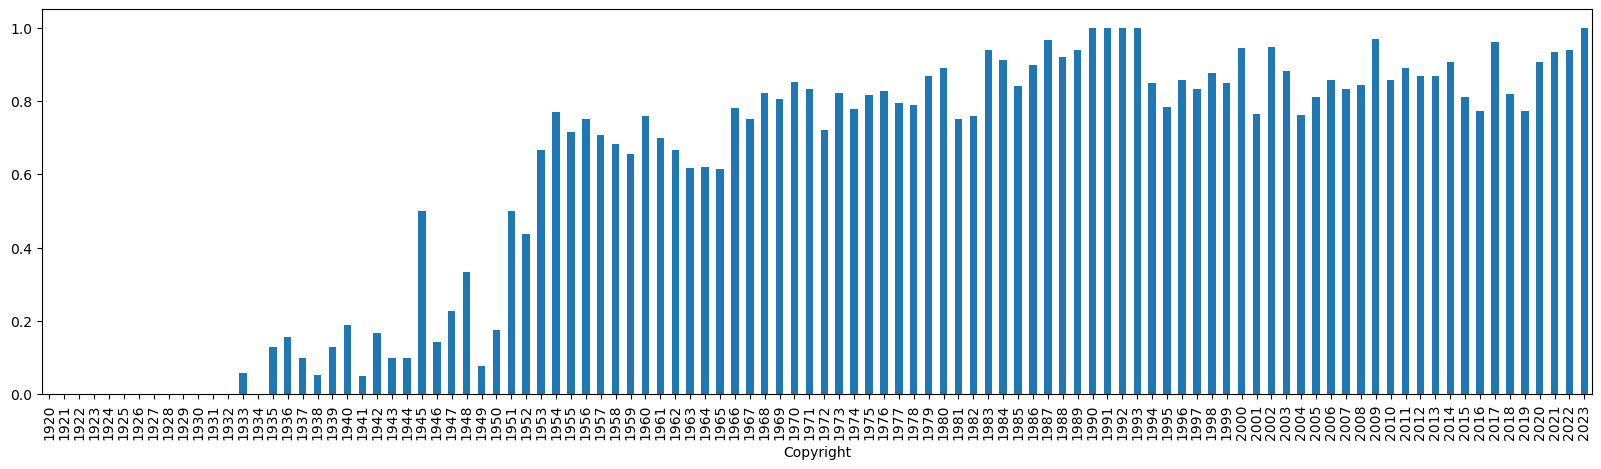

In [116]:
celoplosnahistorie.plot.bar(figsize=(20,5))

In [117]:
celoplosnahistorie[celoplosnahistorie < 0.5].tail(3)

Copyright
1949    0.076923
1950    0.176471
1952    0.437500
Name: celoplošná prolvenost, dtype: float64

In [118]:
celoplosnahistorie[celoplosnahistorie >= 0.5].head(3)

Copyright
1945    0.500000
1951    0.500000
1953    0.666667
Name: celoplošná prolvenost, dtype: float64

In [119]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].head(10)

,Copyright,Film,Lidé
467,1930,Moderní výroba obuvi (401979),Otakar Vávra (9507)
482,1930,Světlo proniká tmou (401977),Otakar Vávra (9507)
484,1930,Zájezd Baťovců do Jugoslavie (401978),Otakar Vávra (9507)
584,1933,Žijeme v Praze (401976),Otakar Vávra (9507)
625,1933,Ze světa lesních samot (395592),Otakar Vávra (9507)
636,1933,Svítání (395596),Otakar Vávra (9507)
695,1935,Vdavky Nanynky Kulichovy (395689),Otakar Vávra (9507)
698,1935,Bezdětná (395699),Otakar Vávra (9507)
701,1935,Jedenácté přikázání (395694),Otakar Vávra (9507)
709,1935,Listopad (395682),Otakar Vávra (9507)


In [120]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].groupby('Lidé')['Copyright'].min().nsmallest(20)

Lidé
Otakar Vávra (9507)           1930
Jiřina Bohdalová (2878)       1937
Vlastimil Brodský (833)       1937
Karel Černý (1241)            1939
Jiří Krejčík (7882)           1946
František Vláčil (5191)       1947
Ladislav Chudík (14421)       1948
Karel Kachyňa (3526)          1949
Vojtěch Jasný (4666)          1949
Jiří Kodet (7135)             1950
Stanislav Milota (11046)      1950
Věra Chytilová (1555)         1951
Miloš Forman (7872)           1952
Hynek Bočan (2947)            1953
Jana Brejchová (7710)         1953
Ladislav Mrkvička (6298)      1953
Stella Zázvorková (834)       1954
Věra Plívová-Šimková (186)    1954
Vladimír Labský (5265)        1955
Miroslav Ondříček (3524)      1956
Name: Copyright, dtype: int64

### Historická prolvenost II

In [121]:
lide

,Copyright,Film,Lidé
0,1898,Staroměstští hasiči (401702),Jan Kříženecký (127419)
1,1898,Smích a pláč (395110),Josef Šváb-Malostranský (55291)
1,1898,Smích a pláč (395110),Jan Kříženecký (127419)
2,1898,Cyklisté (401705),Jan Kříženecký (127419)
3,1898,Defilování vojska o Božím těle na Královských ...,Jan Kříženecký (127419)
...,...,...,...
4572,2023,Ostrov (402284),Karel Zámečník (75946)
4572,2023,Ostrov (402284),Roman Čapek (zvuk
4572,2023,Ostrov (402284),záznam a mix zvuku)
4572,2023,Ostrov (402284),Karel Zámečník


In [122]:
historicky = lide.merge(lvi[['Jméno','Ročník','Lev']], left_on='Lidé', right_on='Jméno')

In [123]:
historicky = historicky[(historicky['Lev'] == 'vyhra') & (historicky['Ročník'] < historicky['Copyright'])].drop_duplicates()

In [124]:
melilva = historicky['Film'].drop_duplicates().to_list()

In [125]:
novodobaprolvenost = pd.Series(filmy[filmy['Film'].isin(melilva)].groupby('Copyright')['Film'].nunique() / filmy.groupby('Copyright')['Film'].nunique(), name="novodobá prolvenost")

<Axes: xlabel='Copyright'>

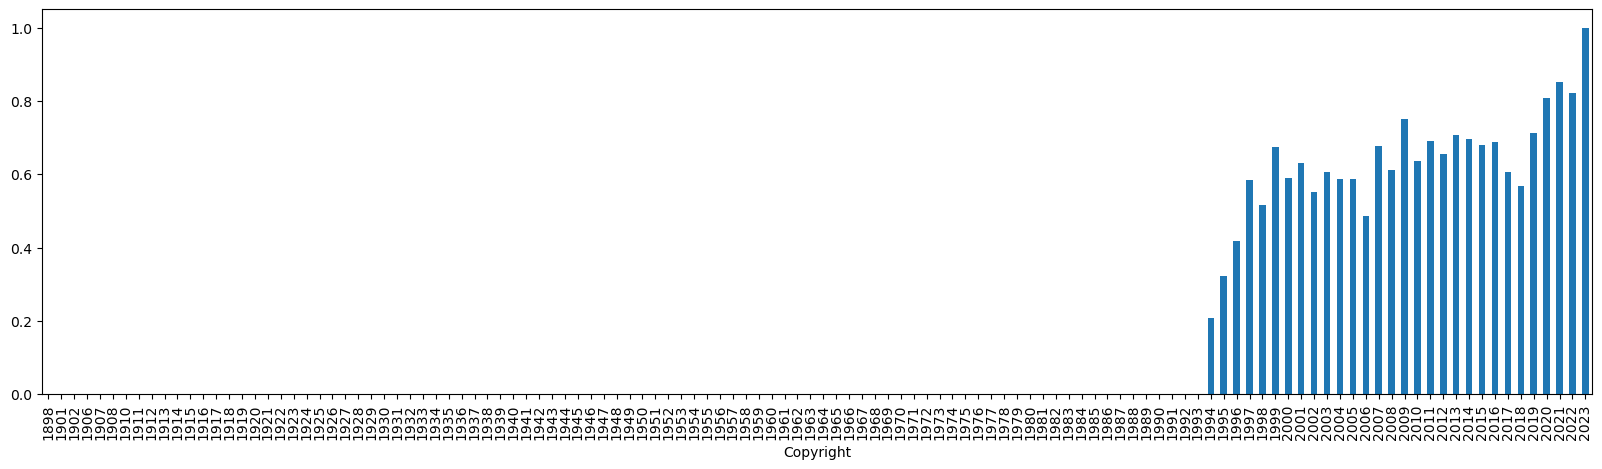

In [126]:
novodobaprolvenost.plot.bar(figsize=(20,5))

In [127]:
novodobaprolvenost[novodobaprolvenost < 0.5]

Copyright
1994    0.206897
1995    0.321429
1996    0.416667
2006    0.487179
Name: novodobá prolvenost, dtype: float64

In [128]:
historicky[historicky['Film'] == 'Mazaný Filip (20319)']['Lidé'].drop_duplicates()

10999    Vladimír Smutný (1772)
18036    Milan Šteindler (1572)
21025       Eva Holubová (5948)
25415        Ivan Trojan (6789)
27311    Anna Geislerová (5433)
36085      Jiří Macháček (3133)
36968    Radim Hladík ml. (580)
40768       Luděk Hudec (12627)
Name: Lidé, dtype: object

## Lvové herectvo x nelvové herectvo

In [129]:
hraji[(hraji['Film'].isin(nejlepsifilmy))].groupby('Hrají').size().nlargest()

Hrají
Marek Daniel (936)          6
Jan Budař (11090)           5
Martin Huba (7134)          5
Ivan Trojan (6789)          4
Jaroslava Pokorná (2727)    4
dtype: int64

In [130]:
daniel1 = hraji[(hraji['Hrají'] == 'Marek Daniel (936)') & hraji['Film'].isin(nejlepsifilmy)]['Film'].to_list()
daniel = [d.split(" (")[0] for d in daniel1]
", ".join(daniel)

'Kolja, Nuda v Brně, Horem Pádem, Štěstí, Protektor, Bába z ledu'

In [131]:
hraji[(hraji['Hrají'] == 'Jaroslava Pokorná (2727)') & hraji['Film'].isin(nejlepsifilmy)]

,Copyright,Film,Hrají
3492,2003,Nuda v Brně (20268),Jaroslava Pokorná (2727)
3831,2012,Ve stínu (66076),Jaroslava Pokorná (2727)
3951,2013,Hořící keř (398412),Jaroslava Pokorná (2727)
4476,2020,Šarlatán (402092),Jaroslava Pokorná (2727)


In [132]:
nejcastejsiherectvo = pd.Series(hraji[hraji['Copyright'] >= 1993].groupby("Hrají").size(), name='Nejčastější herectvo')
nejcastejsiherectvo = nejcastejsiherectvo[nejcastejsiherectvo > 10].index.to_list()
nejcastejsiherectvo

['Alena Mihulová (7032)',
 'Alice Bendová (8726)',
 'Alois Švehlík (6277)',
 'Andrea Hoffmannová',
 'Andrej Hryc (6636)',
 'Andrej Polák (10913)',
 'Anita Krausová (47228)',
 'Anna Geislerová (5433)',
 'Anna Polívková (15610)',
 'Anna Šišková (6600)',
 'Arnošt Goldflam (1579)',
 'Barbora Fišerová (4989)',
 'Barbora Poláková (24914)',
 'Bohumil Klepl (1434)',
 'Boleslav Polívka (1556)',
 'Boris Hybner (7596)',
 'Bořivoj Navrátil (11086)',
 'Csongor Kassai (6576)',
 'Cyril Drozda (938)',
 'Dana Morávková (2293)',
 'David Matásek (3884)',
 'David Novotný (1834)',
 'David Vávra (6006)',
 'David Švehlík (16949)',
 'Eliška Křenková (26750)',
 'Emília Vášáryová (4986)',
 'Ester Geislerová (7019)',
 'Eva Holubová (5948)',
 'Eva Leinweberová Nosálková (2056)',
 'Filip Blažek (3869)',
 'Filip Brouk (20047)',
 'Filip Kaňkovský (32682)',
 'Filip Rajmont (5141)',
 'Gabriela Míčová (9758)',
 'Halka Třešňáková (24197)',
 'Hana Seidlová (6092)',
 'Hana Vagnerová (16186)',
 'Hanuš Bor (7070)',
 'Hynek 

In [133]:
hrajivelvech = hraji[(hraji['Copyright'] >= 1993) & (hraji['Film'].isin(nejlepsifilmy)) & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()
hrajivelvech.nlargest()

Hrají
Marek Daniel (936)          6
Jan Budař (11090)           5
Martin Huba (7134)          5
Ivan Trojan (6789)          4
Jaroslava Pokorná (2727)    4
dtype: int64

In [134]:
hrajivnominacich = hraji[(hraji['Copyright'] >= 1993) & (hraji['Film'].isin(nominovanefilmy)) & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()

In [135]:
hrajivnelvech = hraji[(hraji['Copyright'] >= 1993)  & (hraji['Hrají'].isin(nejcastejsiherectvo))].groupby('Hrají').size()
hrajivnelvech.nlargest()

Hrají
Boleslav Polívka (1556)     51
Ondřej Vetchý (836)         50
Miroslav Táborský (1841)    47
Jiří Lábus (838)            46
Jaromír Dulava (1837)       44
dtype: int64

In [136]:
(hrajivelvech / hrajivnelvech).nlargest(20)

Hrají
Jaroslava Pokorná (2727)    0.333333
Marek Daniel (936)          0.333333
Jiří Ornest (6011)          0.272727
Thomas Zielinski (17060)    0.250000
Martin Huba (7134)          0.238095
Martin Myšička (13007)      0.235294
Tomáš Bambušek (11031)      0.230769
Ivan Trojan (6789)          0.210526
Cyril Drozda (938)          0.181818
Jan Tříska (4834)           0.181818
Jiří Maria Sieber (4710)    0.181818
Pavel Vondruška (12592)     0.181818
Tomáš Turek (7085)          0.181818
Emília Vášáryová (4986)     0.176471
Ivana Uhlířová (11309)      0.176471
Luboš Veselý (6013)         0.173913
Anna Šišková (6600)         0.166667
Karel Heřmánek (6274)       0.166667
Petr Stach (3347)           0.166667
Simona Peková (11310)       0.166667
dtype: float64

**NUTNO ZKONTROLOVAT NOVINKY**

In [137]:
hraji[(hraji['Copyright'] >= 1993) & hraji['Hrají'].isin(nejcastejsiherectvo) & (~hraji['Hrají'].isin(hrajivelvech.index.to_list()))].groupby('Hrají').size().nlargest(10)

Hrají
Marek Vašut (3566)         38
Milan Šteindler (1572)     32
Jaroslav Plesl (22672)     31
Bohumil Klepl (1434)       28
Jan Přeučil (4990)         27
Jan Vondráček (1713)       27
Jaromír Nosek (585)        27
Jiří Mádl (18965)          27
Karel Dobrý (6362)         26
Oldřich Navrátil (7955)    26
dtype: int64

In [138]:
hraji[(hraji['Copyright'] >= 1993) & hraji['Hrají'].isin(nejcastejsiherectvo) & (~hraji['Hrají'].isin(hrajivnominacich.index.to_list()))].groupby('Hrají').size().nlargest(40)

Hrají
Marek Vašut (3566)               38
Milan Šteindler (1572)           32
Josef Somr (1054)                23
Jaroslava Obermaierová (2716)    22
Václav Vydra nejml. (2666)       21
Václav Postránecký (7956)        20
Petr Nárožný (1052)              20
Filip Blažek (3869)              19
Jan Dolanský (1091)              18
Jakub Kohák (2024)               18
Jan Skopeček (8252)              17
Lucie Vondráčková (1057)         17
Jana Synková (12616)             16
Jiří Krampol (4985)              16
Martin Hub (7650)                16
Dana Morávková (2293)            16
Pavel Zedníček (9118)            15
Tomáš Magnusek (28382)           15
Roman Skamene (6363)             15
Lukáš Vaculík (3864)             14
Ondřej Pavelka (6299)            14
Radoslav Brzobohatý (2770)       13
Václav Jiráček (12107)           13
Martin Faltýn (6096)             13
Šárka Vaculíková (16033)         13
Martin Písařík (18968)           13
David Vávra (6006)               13
Michal Dlouhý (1071)  

### Použitá hudba

In [139]:
phudba = filmy[['Copyright','Film','Použitá hudba']].explode('Použitá hudba')
phudba = phudba[(phudba['Copyright'] >= 1993) & (phudba['Film'].isin(celoveceraky))]
nejcastejsiphudba = phudba.groupby('Použitá hudba')['Film'].nunique()
nejcastejsiphudba = nejcastejsiphudba[nejcastejsiphudba >= 10].index.to_list()
phudba = phudba[phudba['Použitá hudba'].isin(nejcastejsiphudba)]

In [140]:
(phudba[phudba['Film'].isin(nejlepsifilmy)].groupby('Použitá hudba')['Film'].nunique() / phudba.groupby('Použitá hudba')['Film'].nunique().dropna()).sort_values()

Použitá hudba
Johann Sebastian Bach (6661)       0.040000
Wolfgang Amadeus Mozart (10959)    0.043478
Antonín Dvořák (1570)              0.047619
Bedřich Smetana (2269)             0.066667
Ludwig van Beethoven (2311)        0.086957
Petr Iljič Čajkovskij (12032)      0.111111
Antonio Vivaldi (8435)                  NaN
Name: Film, dtype: float64

In [141]:
phudba[phudba['Použitá hudba'] == 'Antonio Vivaldi (8435)']

,Copyright,Film,Použitá hudba
3241,1995,UŽ (8749),Antonio Vivaldi (8435)
3384,2000,Zpráva o putování studentů Petra a Jakuba (16884),Antonio Vivaldi (8435)
3555,2006,Ro(c)k podvraťáků (43220),Antonio Vivaldi (8435)
3600,2007,Crash Road (37358),Antonio Vivaldi (8435)
3600,2007,Crash Road (37358),Antonio Vivaldi (8435)
3838,2012,Královská aféra (182846),Antonio Vivaldi (8435)
3935,2013,Maturita (398424),Antonio Vivaldi (8435)
3991,2014,10 pravidel jak sbalit holku (400532),Antonio Vivaldi (8435)
4038,2015,Zero (401761),Antonio Vivaldi (8435)
4038,2015,Zero (401761),Antonio Vivaldi (8435)


In [142]:
hudbakpisni = filmy[['Copyright','Film','Hudba, text a zpěv písně']].explode('Hudba, text a zpěv písně')
hudbakpisni = hudbakpisni[(hudbakpisni['Copyright'] >= 1993) & (hudbakpisni['Film'].isin(celoveceraky))]
nejcastejsihudbakpisni = hudbakpisni.groupby('Hudba, text a zpěv písně')['Film'].nunique()
nejcastejsihudbakpisni = nejcastejsihudbakpisni[nejcastejsihudbakpisni >= 10].index.to_list()
hudbakpisni = hudbakpisni[hudbakpisni['Hudba, text a zpěv písně'].isin(nejcastejsihudbakpisni)]
nejcastejsihudbakpisni

['Dan Bárta (5428)',
 'Eduard Krečmar (22460)',
 'Gabriela Osvaldová (4281)',
 'Jakub Prachař (18670)',
 'Jan P. Muchow (2302)',
 'Jan Werich (1287)',
 'Jaroslav Ježek (1780)',
 'Jiří Suchý (2270)',
 'Jiří Šlitr (2822)',
 'Jiří Štaidl (2827)',
 'Karel Gott (3861)',
 'Karel Svoboda (2860)',
 'Lucie Bílá (7010)',
 'Matěj Ruppert (10986)',
 'Michal Horáček (10958)',
 'Ondřej Soukup (1046)',
 'Oto Klempíř (8834)',
 'Petr Janda (8832)',
 'Petr Ostrouchov (5833)',
 'Richard Müller (6857)',
 'Roman Holý (5129)',
 'Zdeněk Borovec (2828)',
 'Zdeněk Rytíř (16047)']

In [143]:
(hudbakpisni[hudbakpisni['Film'].isin(nejlepsifilmy)].groupby('Hudba, text a zpěv písně')['Film'].nunique() / hudbakpisni.groupby('Hudba, text a zpěv písně')['Film'].nunique().dropna()).sort_values()

Hudba, text a zpěv písně
Karel Gott (3861)            0.047619
Zdeněk Borovec (2828)        0.047619
Jiří Suchý (2270)            0.052632
Jiří Šlitr (2822)            0.055556
Zdeněk Rytíř (16047)         0.055556
Dan Bárta (5428)             0.076923
Jaroslav Ježek (1780)        0.090909
Petr Janda (8832)            0.090909
Petr Ostrouchov (5833)       0.090909
Jan P. Muchow (2302)         0.166667
Eduard Krečmar (22460)            NaN
Gabriela Osvaldová (4281)         NaN
Jakub Prachař (18670)             NaN
Jan Werich (1287)                 NaN
Jiří Štaidl (2827)                NaN
Karel Svoboda (2860)              NaN
Lucie Bílá (7010)                 NaN
Matěj Ruppert (10986)             NaN
Michal Horáček (10958)            NaN
Ondřej Soukup (1046)              NaN
Oto Klempíř (8834)                NaN
Richard Müller (6857)             NaN
Roman Holý (5129)                 NaN
Name: Film, dtype: float64

## Demografie

In [144]:
lvi.groupby('KategorieS').size().sort_values(ascending=False)

KategorieS
Nejlepší film                                              219
Nejlepší zvuk                                              182
Nejlepší dokument                                          171
Nejlepší scénář                                            165
Nejlepší hudba                                             156
Nejlepší střih                                             127
Nejlepší kamera                                            126
Nejlepší režie                                             124
Nejlepší herečka ve vedlejší roli                          121
Hlavní ženský herecký výkon                                121
Nejlepší herec v hlavní roli                               121
Nejlepší herec ve vedlejší roli                            119
Nejlepší výtvarný počin                                    118
Nejlepší masky                                              71
Nejlepší scénografie                                        69
Nejlepší kostýmy                            

In [145]:
(lvi[~lvi['Datum narození'].isnull()].groupby('KategorieS').size() / lvi.groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší krátký film                                       0.433333
Nejlepší masky                                             0.436620
Nejlepší televizní film nebo minisérie                     0.485714
Nejlepší televizní seriál                                  0.486486
Mimořádný počin v oblasti audiovize                        0.500000
Nejlepší scénografie                                       0.507246
Nejlepší hudba                                             0.544872
Nejlepší animovaný film                                    0.594595
Nejlepší kostýmy                                           0.645161
Nejlepší střih                                             0.677165
Nejlepší výtvarný počin                                    0.728814
Nejlepší zvuk                                              0.785714
Nejlepší film                                              0.789954
Nejlepší dokument                                          0.795322
Nejlepší kamera                      

In [146]:
lvi[(lvi['KategorieS'] == 'Nejlepší herec v hlavní roli') & (lvi['Datum narození'].isnull())]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
34,1998,1999-02-28,Hlavní mužský herecký výkon,Boguslaw Linda,nominace,Boguslaw Linda,NaT,None,Je třeba zabít Sekala (163291),Nejlepší herec v hlavní roli,NaT
218,2023,2024-03-09,Nejlepší herec v hlavní roli,Jan Nedbal,nominace,Jan Nedbal,NaT,None,Bratři,Nejlepší herec v hlavní roli,NaT
468,2004,2005-03-05,Hlavní mužský herecký výkon,Iakov Kultiasov,vyhra,Iakov Kultiasov,NaT,None,Král zlodějů (20333),Nejlepší herec v hlavní roli,NaT
889,2013,2014-02-22,Hlavní mužský herecký výkon,Petr Stach (3347),nominace,Petr Stach,NaT,None,Hořící keř (398412),Nejlepší herec v hlavní roli,NaT
1255,2018,2019-03-23,Nejlepší mužský herecký výkon v hlavní roli,Tomáš Mrvík (7048),nominace,Tomáš Mrvík,NaT,None,Všechno bude (401774),Nejlepší herec v hlavní roli,NaT
1426,1994,1995-03-03,Hlavní mužský herecký výkon,Gennadij Nazarov (83928),nominace,Gennadij Nazarov,NaT,None,Život a neobyčejná dobrodružství vojína Ivana ...,Nejlepší herec v hlavní roli,NaT
1539,2003,2004-03-03,Hlavní mužský herecký výkon,György Cserhalmi (15526),nominace,György Cserhalmi,NaT,None,Želary (13452),Nejlepší herec v hlavní roli,NaT
1580,1994,1995-03-03,Hlavní mužský herecký výkon,György Cserhalmi (15526),nominace,György Cserhalmi,NaT,None,Pevnost (185691),Nejlepší herec v hlavní roli,NaT
1854,2010,2011-03-05,Hlavní mužský herecký výkon,Konstantin Lavroněnko (75800),nominace,Konstantin Lavroněnko,NaT,None,Kajínek (55120),Nejlepší herec v hlavní roli,NaT
2502,2022,2023-03-04,Nejlepší herec v hlavní roli,Matyáš Řezníček (86133),nominace,Matyáš Řezníček,NaT,None,Hranice lásky (402262),Nejlepší herec v hlavní roli,NaT


In [147]:
lvi.groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                      14071 days 12:55:23.076923136
Hlavní ženský herecký výkon                               15192 days 05:10:35.294117632
Nejlepší zvuk                                             15403 days 19:07:58.321678336
Cena filmových kritiků a teoretiků za nejlepší dokument   16126 days 11:17:38.823529472
Nejlepší režie                                            16318 days 07:36:35.121951232
Nejlepší film                                             16348 days 08:52:43.005780224
Nejlepší animovaný film                                   16370 days 05:27:16.363636480
Nejlepší herečka ve vedlejší roli                         16516 days 04:56:04.485981184
Nejlepší hudba                                            16862 days 18:55:03.529411840
Nejlepší dokument                                         16960 days 19:14:07.058823424
Nejlepší scénář                                           17032 days 15:53:22.758620672
Nejlepší televizní fi

In [148]:
lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                                10667 days 08:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument             13667 days 00:00:00
Nejlepší zvuk                                             14967 days 03:14:35.675675648
Hlavní ženský herecký výkon                               15577 days 03:18:37.241379328
Nejlepší režie                                                      15646 days 19:12:00
Nejlepší herečka ve vedlejší roli                                   15765 days 00:00:00
Nejlepší film                                                       15916 days 21:36:00
Nejlepší televizní film nebo minisérie                              15981 days 19:12:00
Nejlepší scénář                                           16172 days 06:56:50.526315776
Nejlepší hudba                                            16414 days 01:15:47.368421120
Nejlepší dokument                                         17175 days 13:33:54.782608640
Nejlepší kostýmy     

In [149]:
27987 / 365.25

76.62422997946612

In [150]:
10667 / 365.25

29.204654346338124

In [151]:
(lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS')['Věk'].median() - lvi.groupby('KategorieS')['Věk'].median()).sort_values()

KategorieS
Nejlepší režie                                            -1410 days +12:00:00
Nejlepší kostýmy                                           -742 days +12:00:00
Nejlepší scénář                                            -533 days +00:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument    -475 days +00:00:00
Nejlepší zvuk                                              -282 days +12:00:00
Dlouhodobý přínos českému filmu                                0 days 00:00:00
Cena ČFTA za audiovizuální počin roku                          0 days 00:00:00
Mimořádný počin v oblasti audiovize                            0 days 00:00:00
Nejlepší film                                                 58 days 12:00:00
Nejlepší dokument                                            365 days 00:00:00
Nejlepší herečka ve vedlejší roli                            369 days 00:00:00
Nejlepší herec v hlavní roli                                 424 days 12:00:00
Hlavní ženský herecký výkon              

In [152]:
veky = pd.DataFrame(lvi[lvi['Lev'] == 'vyhra'].groupby(['Ročník','KategorieS'])['Věk'].mean() - lvi[lvi['Lev'] == 'nominace'].groupby(['Ročník','KategorieS'])['Věk'].mean()).reset_index()
veky = veky[veky["Ročník"] > 1993].dropna()
veky = veky[veky['KategorieS'] != 'Dlouhodobý přínos českému filmu']
veky = veky[veky['KategorieS'] != 'Cena ČFTA za audiovizuální počin roku']
veky = veky[veky['KategorieS'] != 'Mimořádný počin v oblasti audiovize']
veky

,Ročník,KategorieS,Věk
11,1994,Hlavní ženský herecký výkon,-2033 days +12:00:00
12,1994,Nejlepší film,-31 days +14:24:00
13,1994,Nejlepší herec v hlavní roli,2058 days 12:00:00
14,1994,Nejlepší herec ve vedlejší roli,-5015 days +12:00:00
15,1994,Nejlepší herečka ve vedlejší roli,5207 days 00:00:00
...,...,...,...
437,2022,Nejlepší režie,6286 days 16:00:00
439,2022,Nejlepší scénář,1226 days 16:00:00
441,2022,Nejlepší televizní film nebo minisérie,-4104 days +09:36:00
442,2022,Nejlepší televizní seriál,4426 days 12:00:00


In [153]:
veky.groupby('KategorieS')['Věk'].median().sort_values()

KategorieS
Nejlepší krátký film                                      -7456 days +15:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument   -3191 days +12:00:00
Nejlepší televizní film nebo minisérie                    -3062 days +20:48:00
Nejlepší scénář                                           -1590 days +14:24:00
Nejlepší hudba                                            -1085 days +00:00:00
Nejlepší režie                                            -1036 days +12:00:00
Nejlepší herečka ve vedlejší roli                          -415 days +08:00:00
Nejlepší film                                              -380 days +00:00:00
Nejlepší zvuk                                              -291 days +09:36:00
Nejlepší střih                                                 0 days 00:00:00
Hlavní ženský herecký výkon                                   65 days 12:00:00
Nejlepší masky                                               137 days 12:00:00
Nejlepší scénografie                     

### Gender

In [154]:
lvice = lvi[(lvi["Jméno bez id"].str[-1:] == 'á') | (lvi["Jméno bez id"].isin(zeny))]

In [155]:
podil_nominovanych = pd.DataFrame(lvice.groupby('KategorieS').size() / lvi.groupby('KategorieS').size()).reset_index().rename(columns={0:'Podíl nominovaných'})
podil_nominovanych.sort_values(by='Podíl nominovaných')

,KategorieS,Podíl nominovaných
12,Nejlepší kamera,0.007937
23,Nejlepší zvuk,0.016484
11,Nejlepší hudba,0.057692
21,Nejlepší televizní seriál,0.081081
17,Nejlepší scénografie,0.086957
16,Nejlepší režie,0.088710
18,Nejlepší scénář,0.109091
19,Nejlepší střih,0.118110
7,Nejlepší film,0.146119
22,Nejlepší výtvarný počin,0.194915


In [156]:
podil_ocenenych = pd.DataFrame(lvice[lvice['Lev'] == 'vyhra'].groupby('KategorieS').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS').size()).reset_index().rename(columns={0:'Podíl oceněných'})
podil_ocenenych.sort_values(by='Podíl oceněných')

,KategorieS,Podíl oceněných
18,Nejlepší scénář,0.048780
19,Nejlepší střih,0.060606
7,Nejlepší film,0.062500
17,Nejlepší scénografie,0.066667
16,Nejlepší režie,0.066667
11,Nejlepší hudba,0.069767
21,Nejlepší televizní seriál,0.111111
22,Nejlepší výtvarný počin,0.171429
2,Dlouhodobý přínos českému filmu,0.218750
20,Nejlepší televizní film nebo minisérie,0.272727


In [157]:
pary = {
    'Nejlepší režie': 'Režie',
    'Nejlepší scénář': 'Scénář',
    'Nejlepší kamera': 'Kamera',
    'Nejlepší masky': 'Masky',
    'Nejlepší zvuk': 'Zvuk',
    'Nejlepší střih': 'Střih',
    'Nejlepší kostýmy': 'Kostýmy'
}

In [158]:
genderove_srovnani = []
for key, val in pary.items():
    slovnik = {}
    sloupec = val
    pracovni = filmy[(filmy['Film'].isin(celoveceraky)) & (filmy['Copyright'] >= 1993)].copy()
    pracovni = pracovni[['Film',sloupec]].explode(sloupec)
    pracovni[sloupec] = pracovni[sloupec].apply(lambda x: x.split('(')[0].strip() if isinstance(x,str) else None)
    slovnik['Profese'] = val
    slovnik['KategorieS'] = key
    slovnik['Délka'] = len(pracovni)
    podil_zen = len(pracovni[pracovni[sloupec].isin(zeny)]) / len(pracovni)
    slovnik['Podíl žen celkově'] = podil_zen
    genderove_srovnani.append(slovnik)
genderove_srovnani = pd.DataFrame(genderove_srovnani)

In [159]:
genderove_srovnani

,Profese,KategorieS,Délka,Podíl žen celkově
0,Režie,Nejlepší režie,828,0.088164
1,Scénář,Nejlepší scénář,1633,0.139008
2,Kamera,Nejlepší kamera,1013,0.006910
3,Masky,Nejlepší masky,1871,0.466595
4,Zvuk,Nejlepší zvuk,3354,0.053965
5,Střih,Nejlepší střih,934,0.079229
6,Kostýmy,Nejlepší kostýmy,1528,0.475131


In [160]:
g_srovnani = genderove_srovnani.merge(podil_nominovanych, on="KategorieS", how="inner")
g_srovnani = g_srovnani.merge(podil_ocenenych, on="KategorieS", how="inner")

In [161]:
g_srovnani['real x nominace'] = g_srovnani['Podíl nominovaných'] / g_srovnani['Podíl žen celkově']

In [162]:
g_srovnani.sort_values(by="real x nominace")

,Profese,KategorieS,Délka,Podíl žen celkově,Podíl nominovaných,Podíl oceněných,real x nominace
4,Zvuk,Nejlepší zvuk,3354,0.053965,0.016484,NaN,0.305446
1,Scénář,Nejlepší scénář,1633,0.139008,0.109091,0.048780,0.784782
0,Režie,Nejlepší režie,828,0.088164,0.088710,0.066667,1.006186
3,Masky,Nejlepší masky,1871,0.466595,0.535211,0.363636,1.147056
2,Kamera,Nejlepší kamera,1013,0.006910,0.007937,NaN,1.148526
5,Střih,Nejlepší střih,934,0.079229,0.118110,0.060606,1.490743
6,Kostýmy,Nejlepší kostýmy,1528,0.475131,0.822581,0.833333,1.731272


In [163]:
filmy.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititu

In [164]:
def kontrola_genderu(kategorie):
    muzsti = lvi[(lvi['KategorieS'] == kategorie) & (~lvi['Jméno bez id'].isin(zeny))]['Jméno'].to_list()
    zenske = lvi[(lvi['KategorieS'] == kategorie) & (lvi['Jméno bez id'].isin(zeny))]['Jméno'].to_list()
    odpoved = f"{len(zenske) / (len(muzsti) + len(zenske))}"
    odpoved += "\n"    
    odpoved += f"Muži ({len(muzsti)}):"
    odpoved += "\n"
    odpoved += ', '.join(muzsti)
    odpoved += "\n"
    odpoved += "\n"
    odpoved += f"Ženy ({len(zenske)}):"
    odpoved += "\n"
    odpoved += ', '.join(zenske)

    return odpoved

In [165]:
print(kontrola_genderu('Nejlepší masky'))

0.5352112676056338
Muži (33):
René Stejskal (21783), Lukáš Král (18937), Zdeněk Klika (1808), Lukáš Král (18937), Jaroslav Šámal (1403), Lukáš Král (18937), Lukáš Král (18937), Zdeněk Klika (1808), Milan Vlček (3261), Ivo Strangmüller (4401), René Stejskal (21783), Ivo Strangmüller (4401), Jamie Kelman, Martin Valeš (22489), Martin Větrovec (5924), Zdeněk Klika (1808), Martin Jankovič (9841), Zdeněk Klika (1808), Leendert Van Nimwegen, Martin Valeš (22489), Zdeněk Klika (1808), Lukáš Král (18937), Lukáš Král (18937), Lukáš Král (18937), Jaroslav Šámal (1403), René Stejskal (21783), Vladimír Wittgruber, René Stejskal (21783), Martin Jankovič (9841), Juraj Steiner (9811), René Stejskal (21783), Ivo Strangmüller (4401), David Šesták (4708)

Ženy (38):
Andrea McDonald (130268), Gabriela Poláková, Jana Bílková (17734), Adéla Anděla Bursová, Lucie Lišková (41086), Jana Bílková (17734), Jana Dopitová (1563), Jana Bílková (17734), Lenka Nosková, Jana Radilová (3871), Anita Hroššová, Jana Bílko

In [166]:
lvice[(lvice['KategorieS'] == 'Nejlepší scénář') & (lvice['Lev'] == 'vyhra')]['Jméno'].drop_duplicates()

1481    Halina Pawlowská (9006)
1864         Alice Nellis (535)
Name: Jméno, dtype: object

In [167]:
lvice[lvice['Kategorie'] == 'Nejlepší kamera']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1975,2023,2024-03-09,Nejlepší kamera,Anna Smoroňová,nominace,Anna Smoroňová,NaT,None,Němá tajemství,Nejlepší kamera,NaT


In [168]:
lvice[lvice['Kategorie'] == 'Nejlepší zvuk']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
904,2022,2023-03-04,Nejlepší zvuk,Michaela Patríková (35525),nominace,Michaela Patríková,NaT,None,Světlonoc,Nejlepší zvuk,NaT
1069,2021,2022-03-05,Nejlepší zvuk,Sandra Klouzová (60087),nominace,Sandra Klouzová,NaT,None,Okupace (402157),Nejlepší zvuk,NaT
1310,2023,2024-03-09,Nejlepší zvuk,Michaela Patríková (35525),nominace,Michaela Patríková,NaT,None,Přišla v noci,Nejlepší zvuk,NaT


<Axes: xlabel='Ročník'>

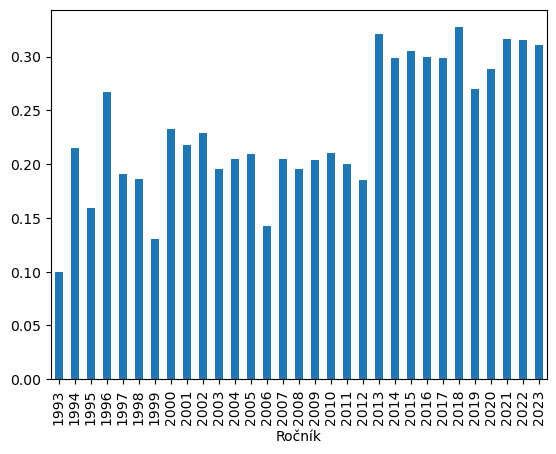

In [169]:
(lvice.groupby('Ročník').size() / lvi.groupby('Ročník').size()).plot.bar()

<Axes: xlabel='Ročník'>

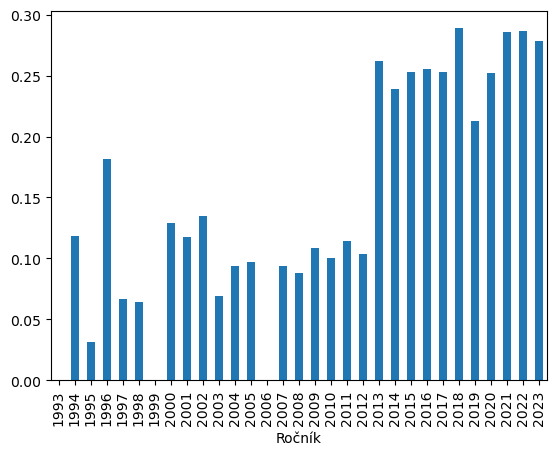

In [170]:
(lvice[~lvice['KategorieS'].isin(hereckekategorie)].groupby('Ročník').size() / lvi[~lvi['KategorieS'].isin(hereckekategorie)].groupby('Ročník').size()).plot.bar()

In [171]:
(lvice[~lvice['KategorieS'].isin(hereckekategorie)].groupby('Ročník').size() / lvi[~lvi['KategorieS'].isin(hereckekategorie)].groupby('Ročník').size())

Ročník
1993         NaN
1994    0.118644
1995    0.031250
1996    0.181818
1997    0.066667
1998    0.064516
1999         NaN
2000    0.129032
2001    0.117647
2002    0.135135
2003    0.068966
2004    0.093750
2005    0.096774
2006         NaN
2007    0.093750
2008    0.088235
2009    0.108108
2010    0.100000
2011    0.114286
2012    0.103896
2013    0.262295
2014    0.238806
2015    0.253333
2016    0.255556
2017    0.252874
2018    0.288889
2019    0.212500
2020    0.252174
2021    0.285714
2022    0.286822
2023    0.278261
dtype: float64

<Axes: xlabel='Ročník'>

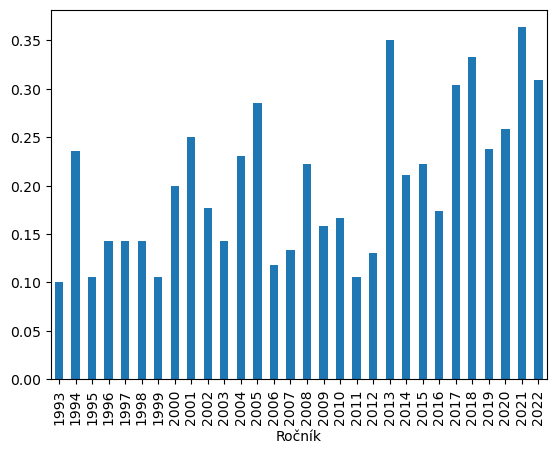

In [172]:
(lvice[lvice['Lev'] == 'vyhra'].groupby('Ročník').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('Ročník').size()).plot.bar()

<Axes: xlabel='Ročník'>

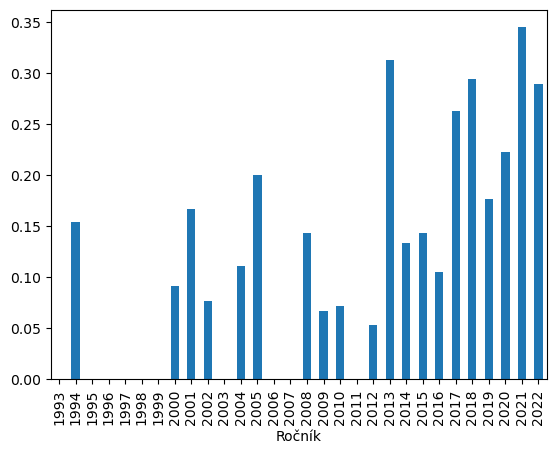

In [173]:
(lvice[(lvice['Lev'] == 'vyhra') & (~lvice['KategorieS'].isin(hereckekategorie))].groupby('Ročník').size() / lvi[(lvi['Lev'] == 'vyhra') & (~lvi['KategorieS'].isin(hereckekategorie))].groupby('Ročník').size()).plot.bar()

## Lvi vs. čsfd

In [174]:
csfd = pd.read_json(os.path.join("data","lvy_csfd.json"))

In [175]:
csfd.loc[csfd['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [176]:
csfd.sort_values(by="Hodnocení", ascending=False)

,Film,Hodnocení,Počet hodnocení
3,Kolja (9013),86,62628
20,Hořící keř (398412),86,18718
7,Musíme si pomáhat (15231),85,35356
5,Je třeba zabít Sekala (163291),83,13392
15,Karamazovi (56434),82,13181
9,Rok ďábla (12836),80,14534
2,Zahrada (8967),80,4279
4,Knoflíkáři (9793),80,16878
19,Ve stínu (66076),79,21561
28,Zátopek,78,11964


In [177]:
csfd.sort_values(by="Počet hodnocení", ascending=True)

,Film,Hodnocení,Počet hodnocení
29,Il Boemo,63,3313
21,Cesta ven (400548),60,3671
25,Všechno bude (401774),59,3822
2,Zahrada (8967),80,4279
18,Poupata (116470),65,4971
8,Otesánek (401949),64,6061
26,Nabarvené ptáče (401962),68,8191
17,Pouta (80516),73,8719
1,Díky za každé nové ráno (7866),74,9328
14,Tajnosti (52699),69,9359
